<a href="https://colab.research.google.com/github/prajwalan01/mobile_Price_Range_Prediction/blob/main/Mobile_Price__Range__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -*Rushikesh Halkanche*
##### **Team Member 2 -*Prajwal Andure*


# **Project Summary -**

Now a days, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to complete with its rivals.This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market.During the purchase of mobile phones, various features like memory, display, battery, camera, etc., are considered. People fail to make correct decisions, due to the non-availability of necessary resources to cross-validate the price. To address this issue, a machine learning model is developed using the data related to the key features of the mobile phone. The developed model is then used to predict the price range of the new mobile phone.use the machine learning algorithms namely Support Vector Machine (SVM), Random Forest Classifier (RFC), Logistic Regression,Decission Tree,Naive Bayes Theorm,K-nearest neighbors are used to train the model and predict the output as low, medium, high or very high of price range.

# **GitHub Link -**

*Rushikesh Halkanche* - https://github.com/Rushikeshhalkanche

*Prajwal Andure* - https://github.com/prajwalan01

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
df = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset Rows & Columns count

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Description of the data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### Duplicate Values

In [ ]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

In [ ]:
df.shape

(2000, 21)

#### Missing Values/Null Values

In [ ]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

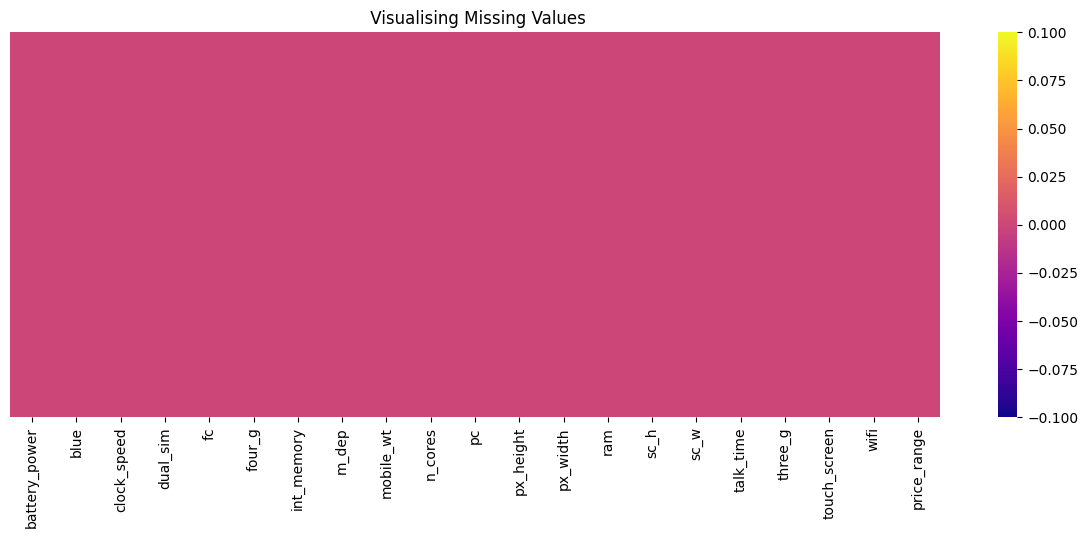

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the priceNo Null values found. Which is good thing for us.

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


### Variables Description



Battery_power : Total energy a battery can store in one time measured in mAh

Blue : Has bluetooth or not

Clock_speed : speed at which microprocessor executes instructions

Dual_sim : Has dual sim support or not

Fc : Front Camera mega pixels

Four_g : Has 4G or not

Int_memory : Internal Memory in Gigabytes

M_dep : Mobile Depth in cm

Mobile_wt : Weight of mobile phone

N_cores : Number of cores of processor

Pc : Primary Camera mega pixels

Px_height : Pixel Resolution Height

Px_width : Pixel Resolution Width

Ram : Random Access Memory in Mega

Touch_screen : Has touch screen or not

Wifi : Has wifi or not

Sc_h : Screen Height of mobile in cm

Sc_w : Screen Width of mobile in cm

Talk_time : longest time that a single battery charge will last when you are

Three_g : Has 3G or not

Wifi : Has wifi or not

Price_range : This is the target variable with value of 0(low cost), (medium cost),2(high cost) and 3(very high cost).




### Check Unique Values for each variable.

In [ ]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking mobile belongs to price range 0
print("No of mobile belongs to price_range 0 is :",len(df[df['price_range']==0]))

# Checking mobile belongs to price range 1
print("No of mobile belongs to price_range 1 is :",len(df[df['price_range']==1]))

# Checking mobile belongs to price range 2
print("No of mobile belongs to price_range 2 is :",len(df[df['price_range']==2]))

# Checking mobile belongs to price range 3
print("No of mobile belongs to price_range 3 is :",len(df[df['price_range']==3]))

No of mobile belongs to price_range 0 is : 500
No of mobile belongs to price_range 1 is : 500
No of mobile belongs to price_range 2 is : 500
No of mobile belongs to price_range 3 is : 500


In [ ]:
# show value counts
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# Mobile phones groupby 4g support and not supports
df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,four_g,price_range,Count
4,1,3,275
5,1,1,262
6,1,0,259
0,0,2,253
7,1,2,247
1,0,0,241
2,0,1,238
3,0,3,225


In [ ]:
# Mobile phones groupby 3g support and not supports
df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,three_g,price_range,Count
4,1,2,387
5,1,3,385
6,1,1,378
7,1,0,373
0,0,0,127
1,0,1,122
2,0,3,115
3,0,2,113


In [ ]:
# Mobile phones groupby blue support and not supports
df.groupby('blue')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,blue,price_range,Count
4,1,3,259
0,0,0,257
1,0,2,257
2,0,1,255
5,1,1,245
6,1,0,243
7,1,2,243
3,0,3,241


In [ ]:
# Mobile phones groupby dual sim support and not supports
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,dual_sim,price_range,Count
4,1,3,265
5,1,1,255
0,0,2,251
1,0,0,250
6,1,0,250
7,1,2,249
2,0,1,245
3,0,3,235


In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


In [ ]:
# Pixels count
df['px_count'] = df['px_width']*df['px_height']

In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


In [ ]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=False)[ ['price_range', 'px_count'] ].head(10)

,price_range,px_count
988,3,3886306.0
1771,2,3847480.0
1017,3,3744520.0
1397,0,3720318.0
894,2,3711360.0
1615,3,3703024.0
260,1,3690192.0
1163,2,3649920.0
148,2,3642884.0
305,1,3629598.0


In [ ]:
# Write your code to make your dataset analysis ready.
data_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:
data_num

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20.0,756,2549,9,7.0,19
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222.0,1890,668,13,4.0,19
1996,1965,2.6,0,39,0.2,187,4,3,915.0,1965,2032,11,10.0,16
1997,1911,0.9,1,36,0.7,108,8,3,868.0,1632,3057,9,1.0,5
1998,1512,0.9,4,46,0.1,145,5,5,336.0,670,869,18,10.0,19


In [ ]:
data_cat

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


### What all manipulations have you done and insights you found?

The dependent variable 4 types of unique variable and all 4 same length of value are their.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: ylabel='price_range'>

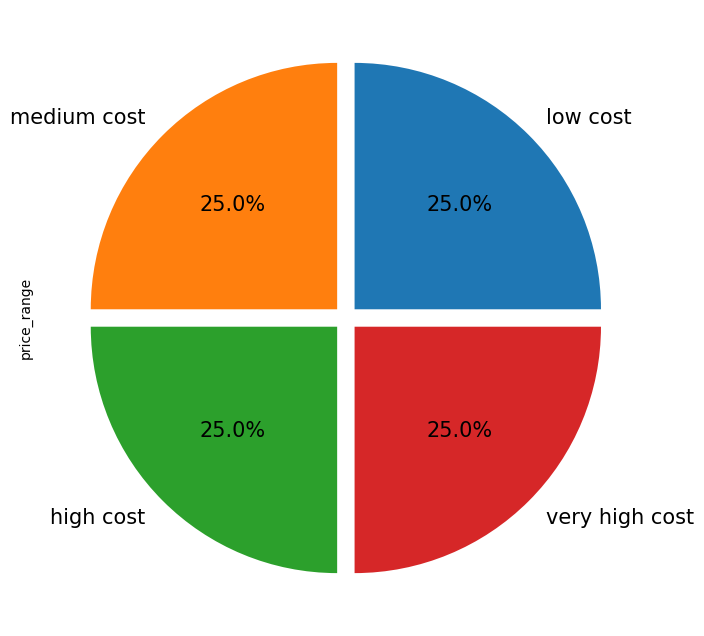

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting

##### 1. Why did you pick the specific chart?

Visualizing the Target variable's class distribution.

##### 2. What is/are the insight(s) found from the chart?

we have almost equal number of obseravtions for each category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that our target varibale is equally distributed.
Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

#### Chart - 2

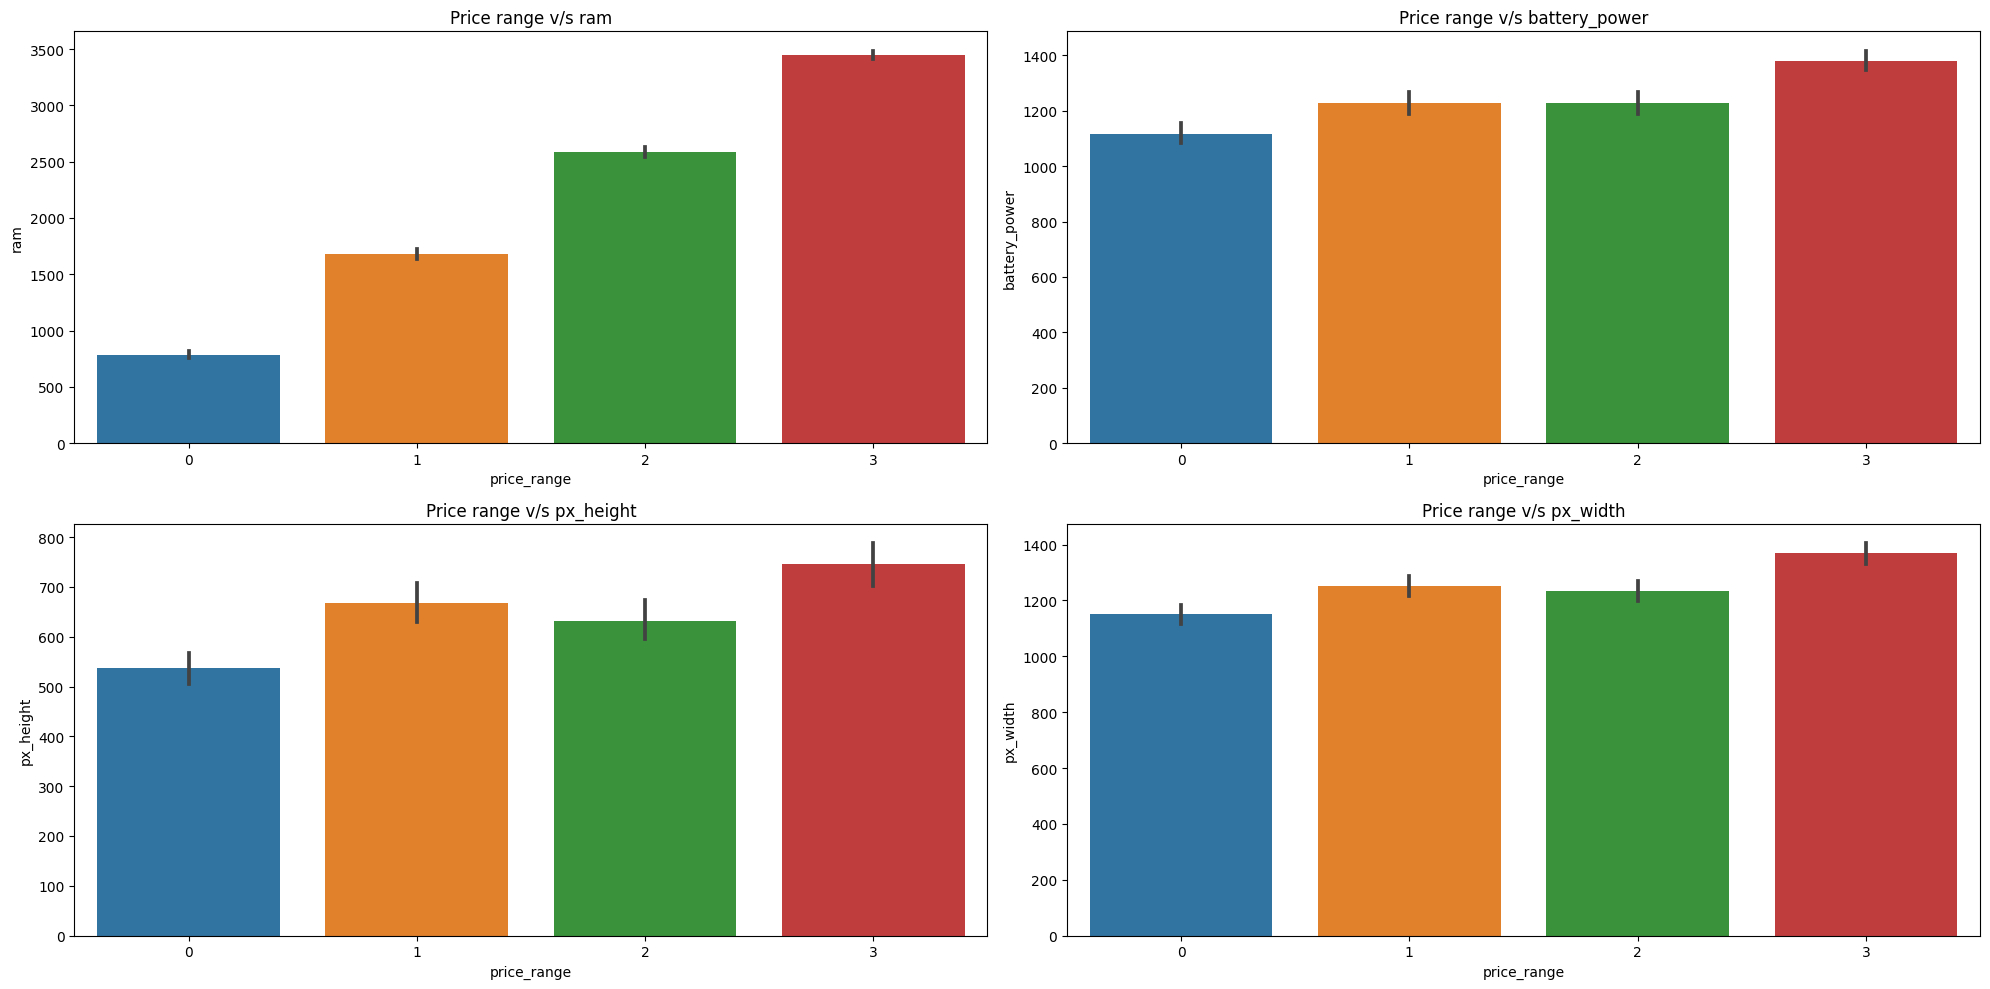

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

Relation Between RAM,Battery_power,px_height and px_width.

##### 2. What is/are the insight(s) found from the chart?

Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

Mobiles having RAM less than 1000 MB falls under low cost category.

Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.

Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

#### Chart - 3

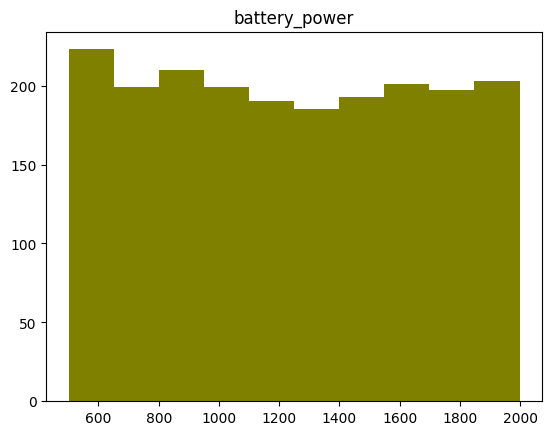

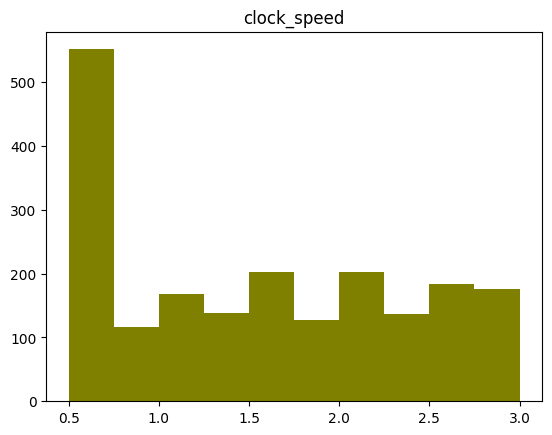

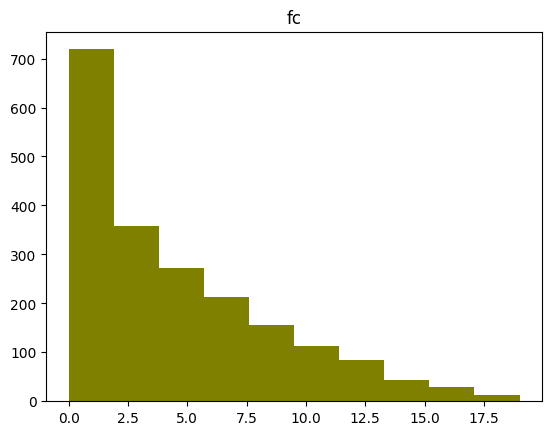

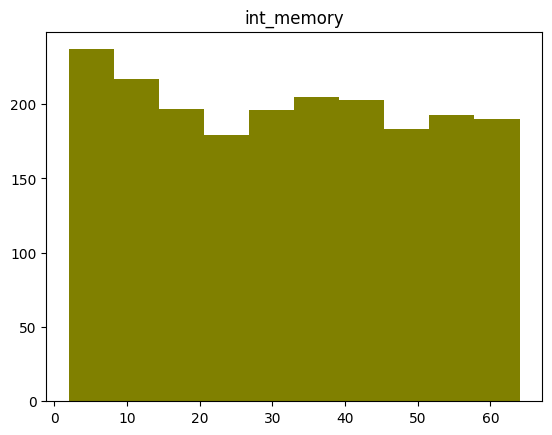

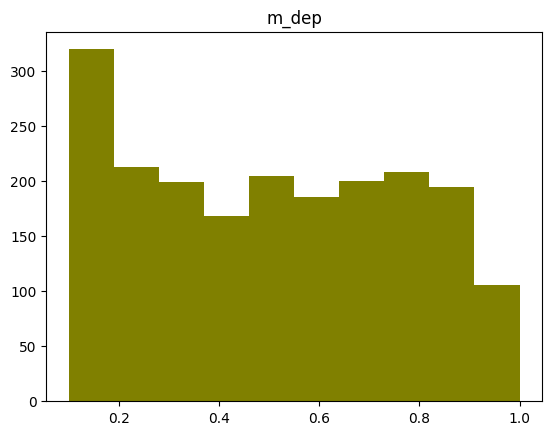

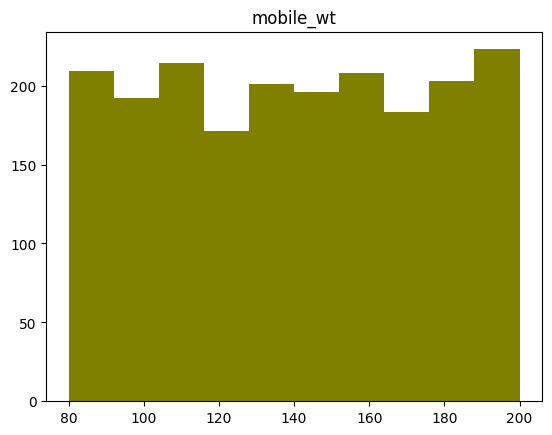

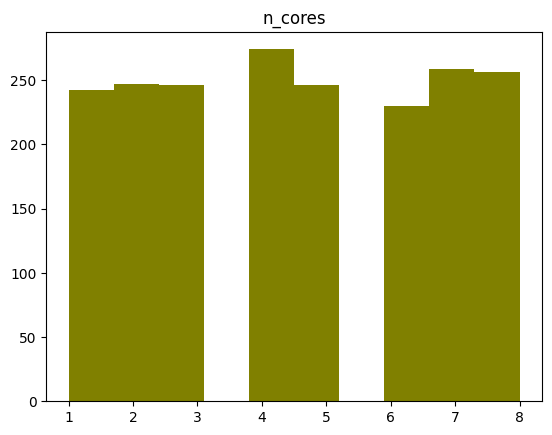

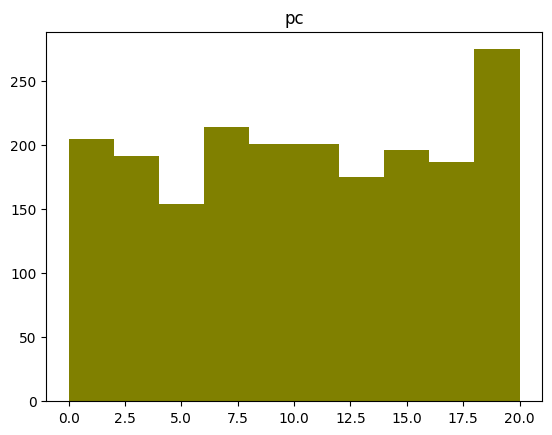

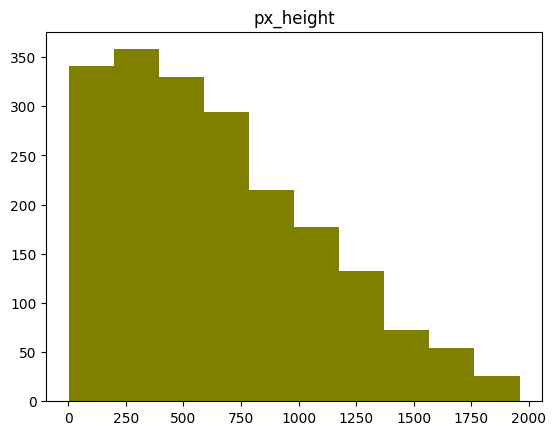

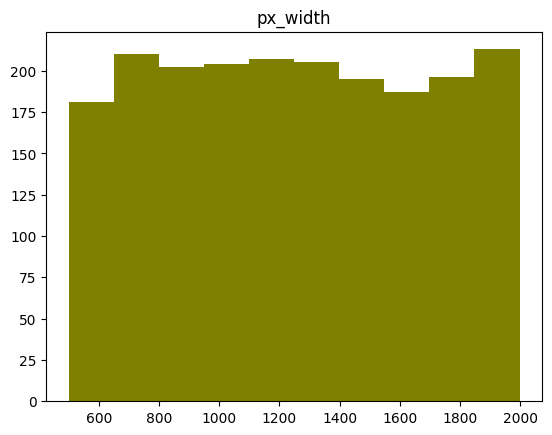

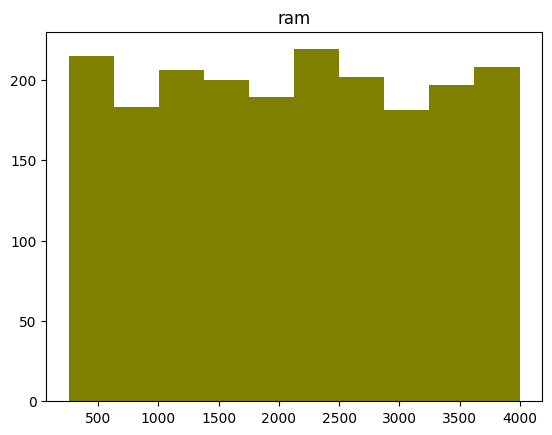

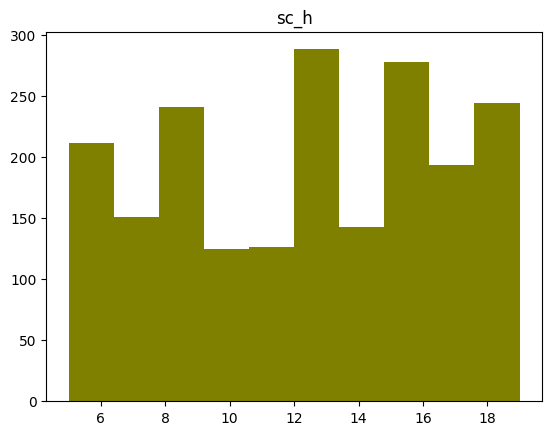

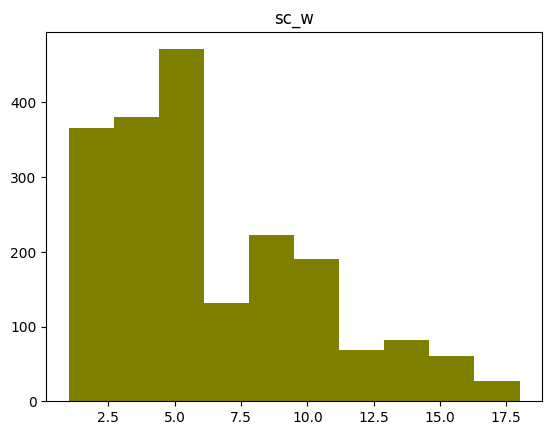

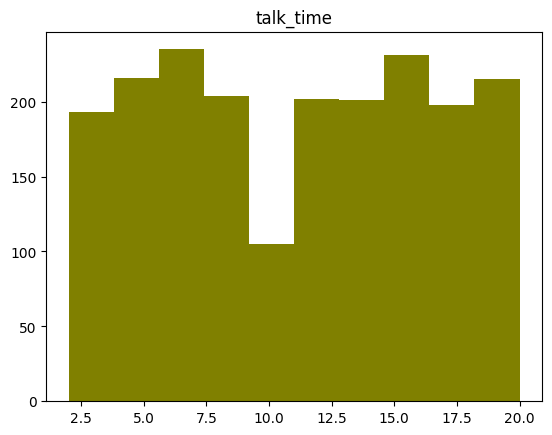

In [ ]:
# Chart - 3 visualization code
for i in data_num.columns:
    plt.hist(df[i],color='#808000')
    plt.title(i)
    plt.show()


##### 1. Why did you pick the specific chart?

In this histplot graph we check all nummerical column check the frequency.

##### 2. What is/are the insight(s) found from the chart?

In this histplot graph we check all nummerical column check the frequency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

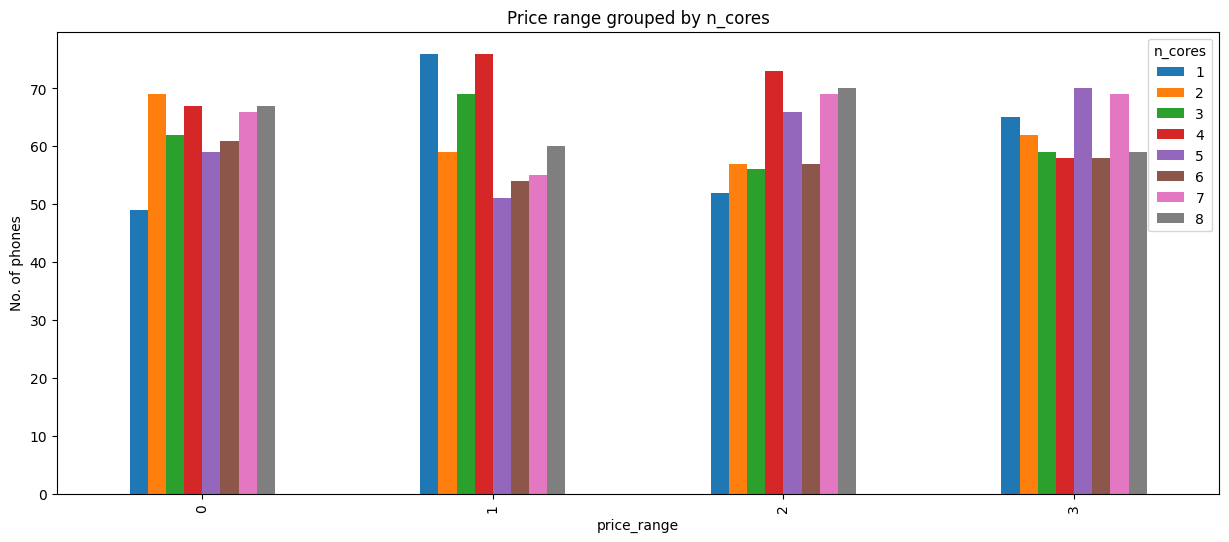

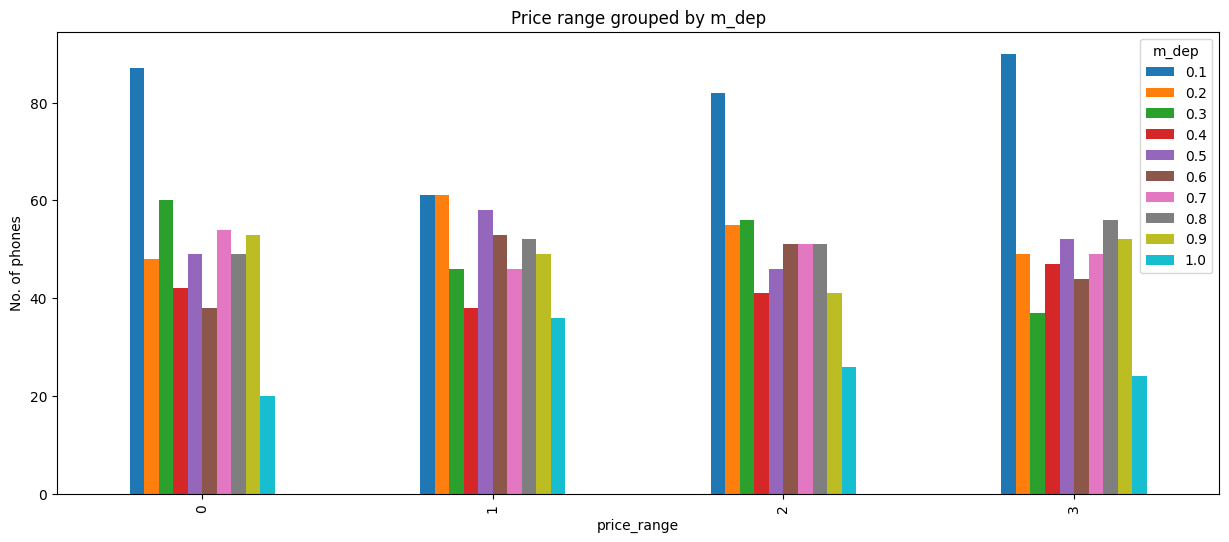

In [ ]:
list_2=['n_cores','m_dep']
for item in list_2:

  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')


##### 1. Why did you pick the specific chart?

Count of phones in each price range.

##### 2. What is/are the insight(s) found from the chart?

There are very few mobiles in price range 0 and 1 with lesser no of cores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness is high and count of phones with high thickness is low.

#### Chart - 5

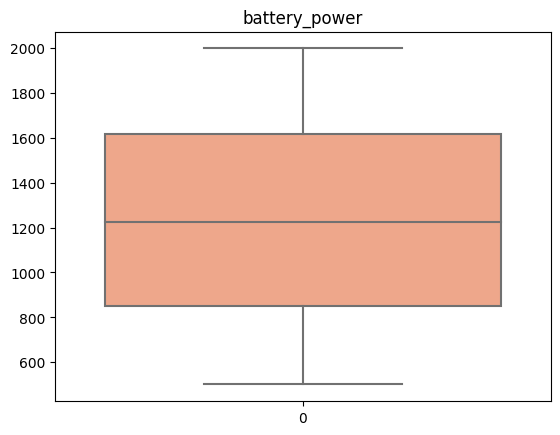

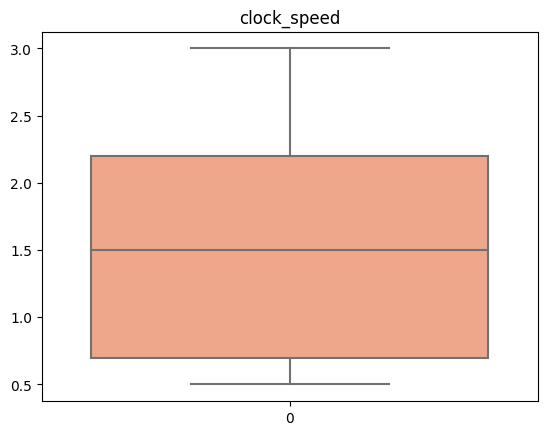

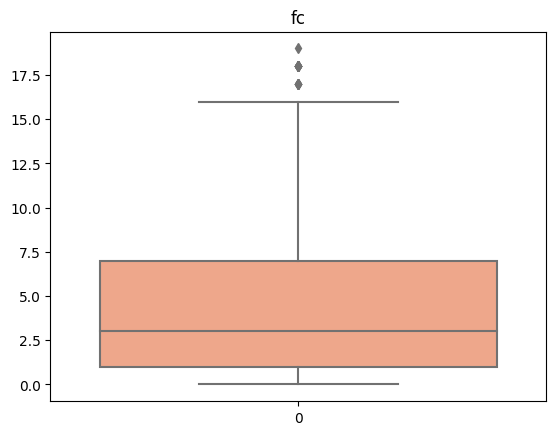

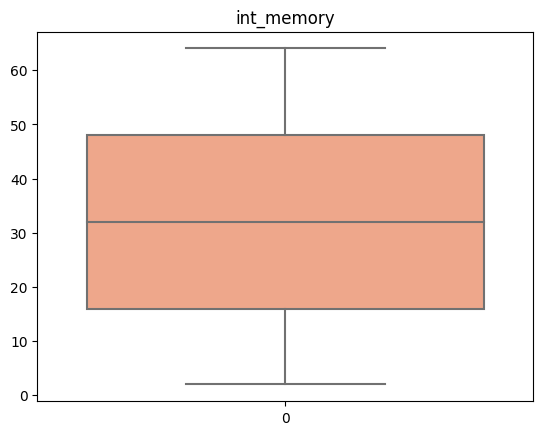

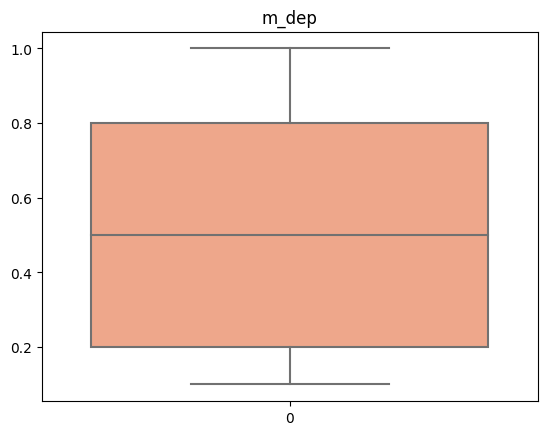

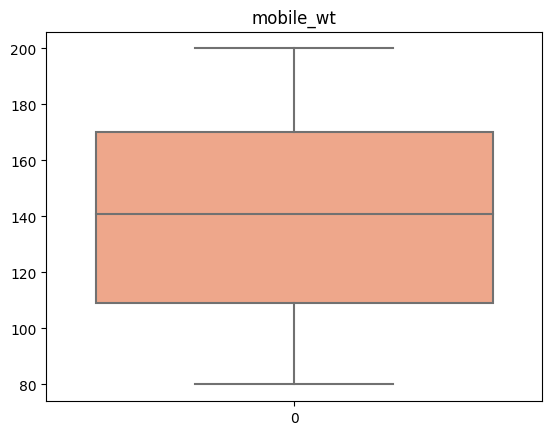

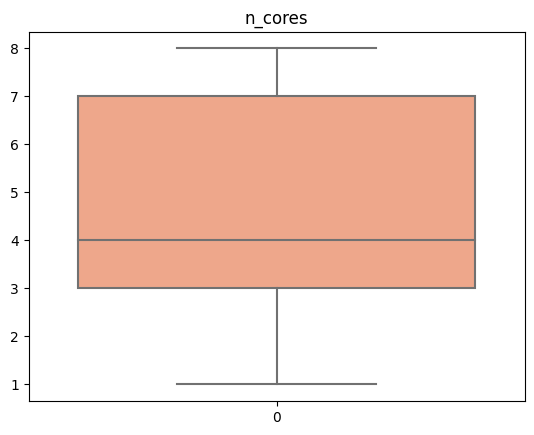

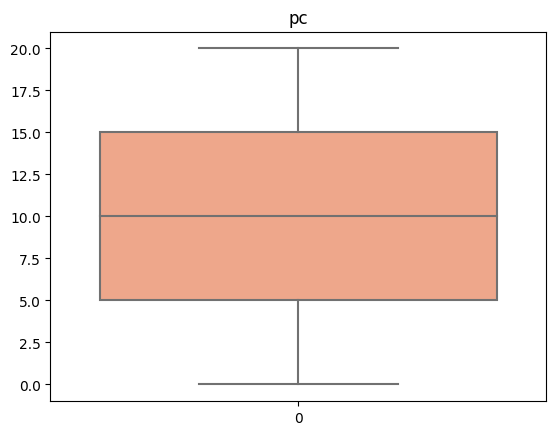

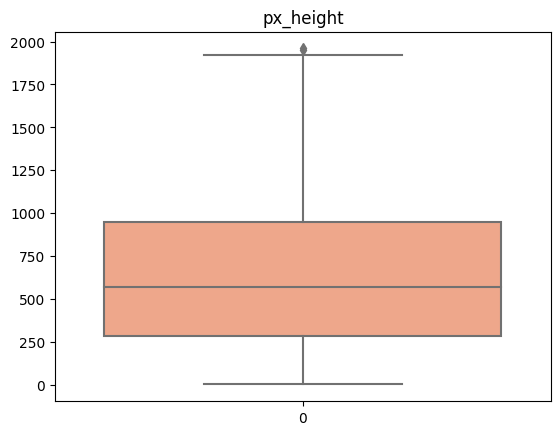

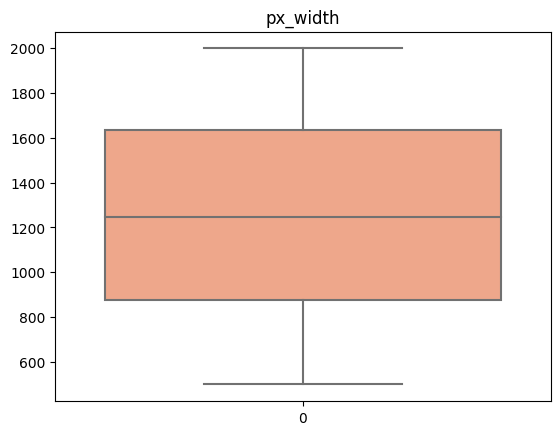

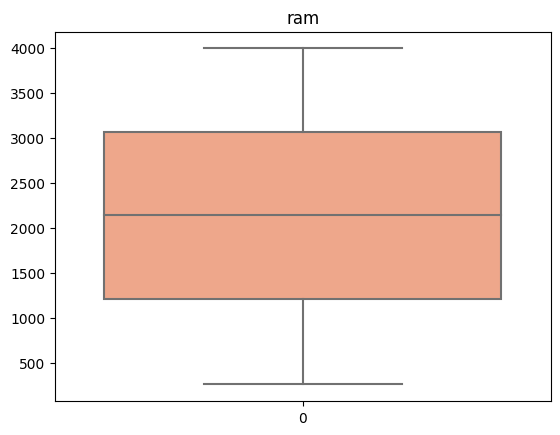

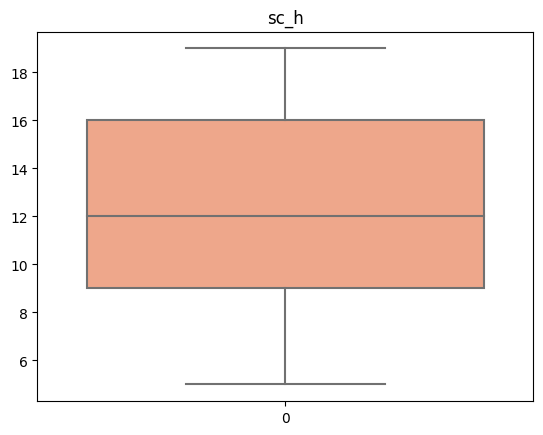

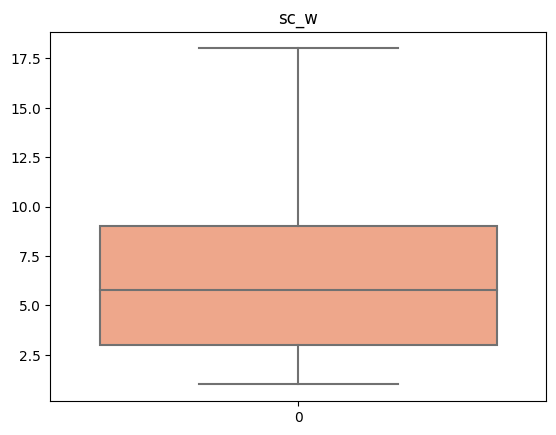

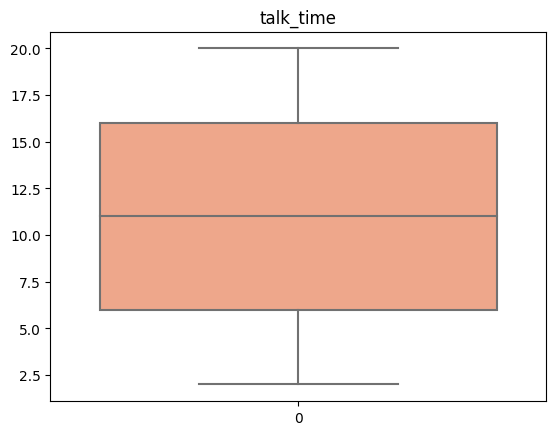

In [ ]:
# Chart - 5 visualization code
# dealing with outliers values
for i in data_num.columns:
    sns.boxplot(data_num[i],color='#FFA07A')
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here Area code will be treated as text values as there are only 3 values in the particular column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 6

<Axes: xlabel='price_range', ylabel='battery_power'>

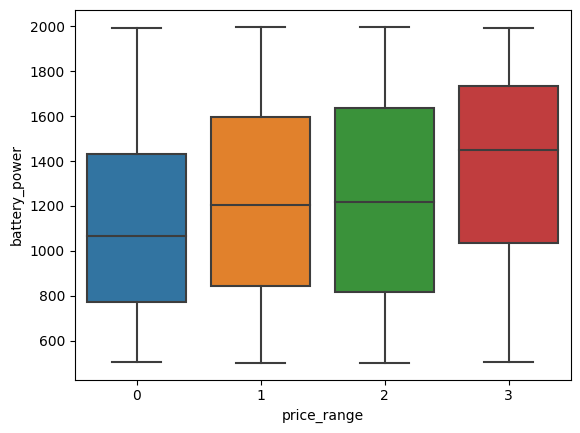

In [ ]:
# Chart - 6 visualization code
sns.boxplot(x="price_range", y="battery_power", data=df)

##### 1. Why did you pick the specific chart?

To find out Battery_power vs price_range.

##### 2. What is/are the insight(s) found from the chart?

When Battery_power increasses price_range also increass

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0.5, 0, 'MegaPixels')

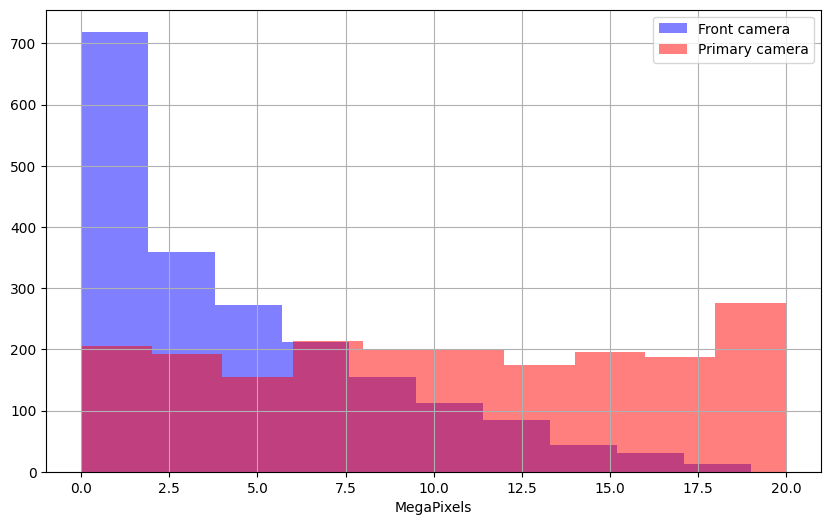

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### 1. Why did you pick the specific chart?

To find out No of Phones vs Camera megapixels of front and primary camera.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

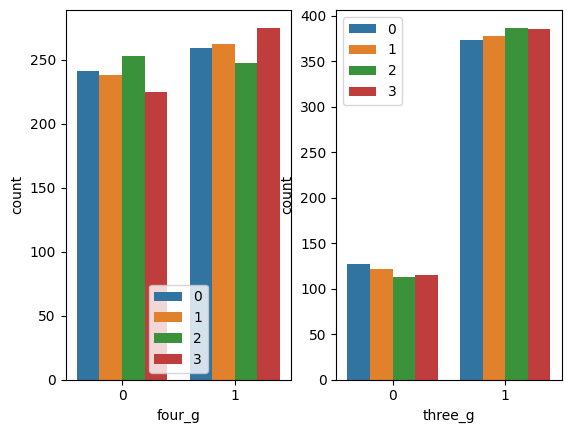

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'four_g',hue= 'price_range',data  = df)
plt.legend()
plt.subplot(122)
sns.countplot(x = 'three_g',hue= 'price_range',data  = df)
plt.legend()

##### 1. Why did you pick the specific chart?

To find outCount of four_g and three_g.

##### 2. What is/are the insight(s) found from the chart?

Four_g count is more than three_g count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualizat
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'px_count'],
      dtype='object')

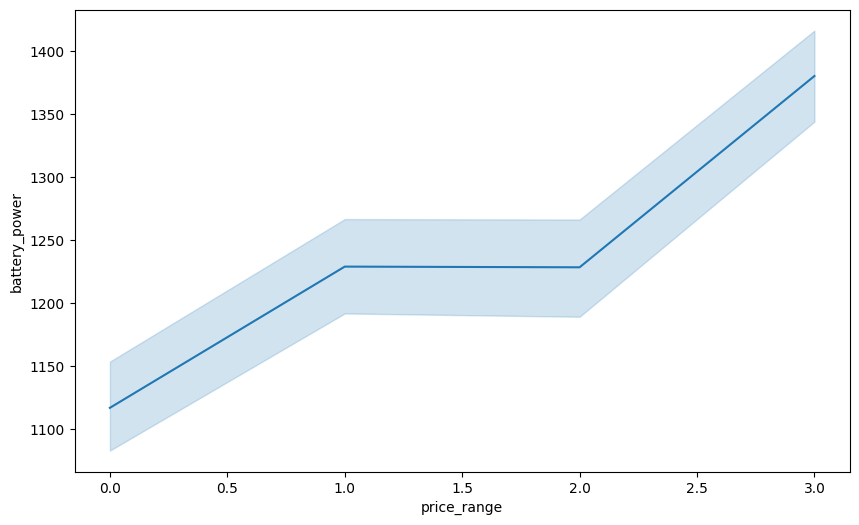

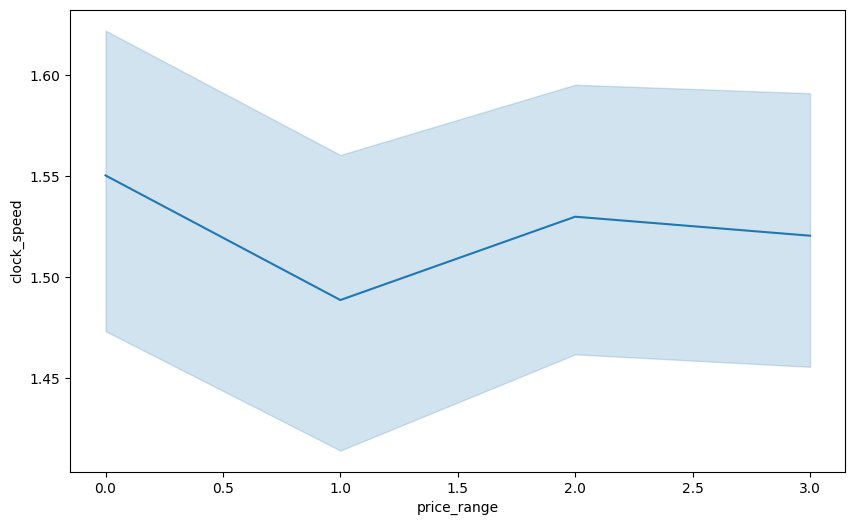

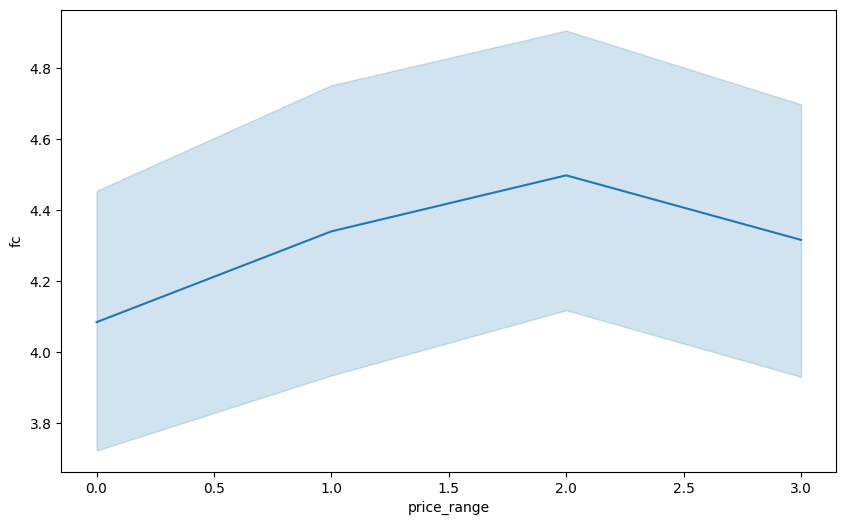

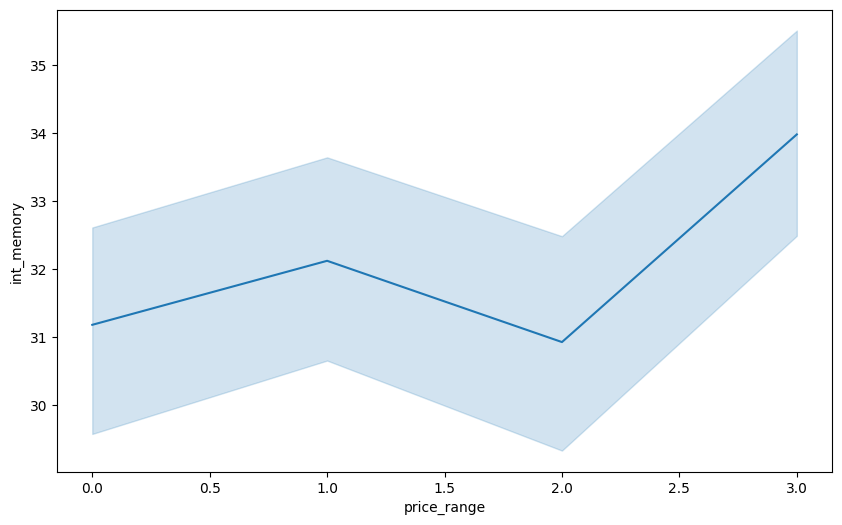

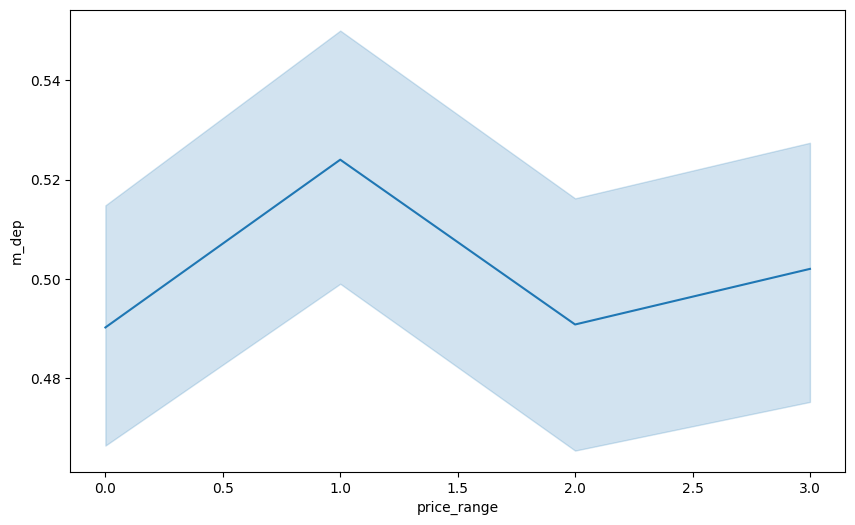

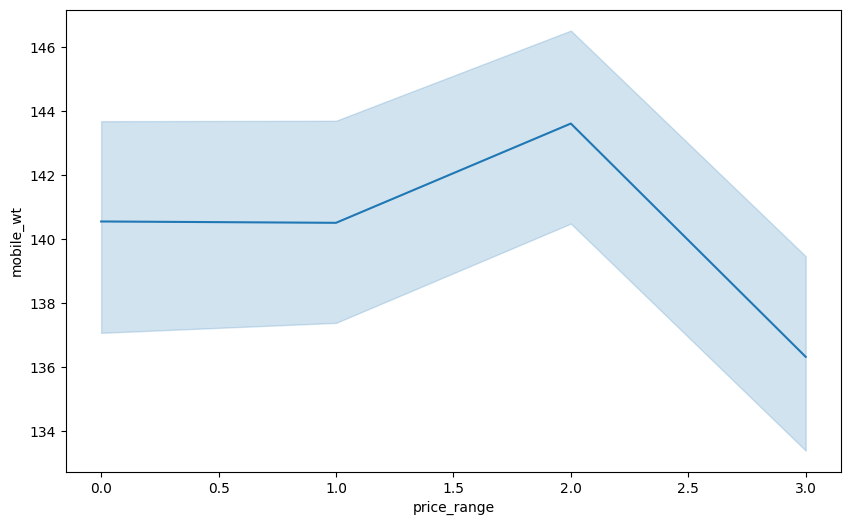

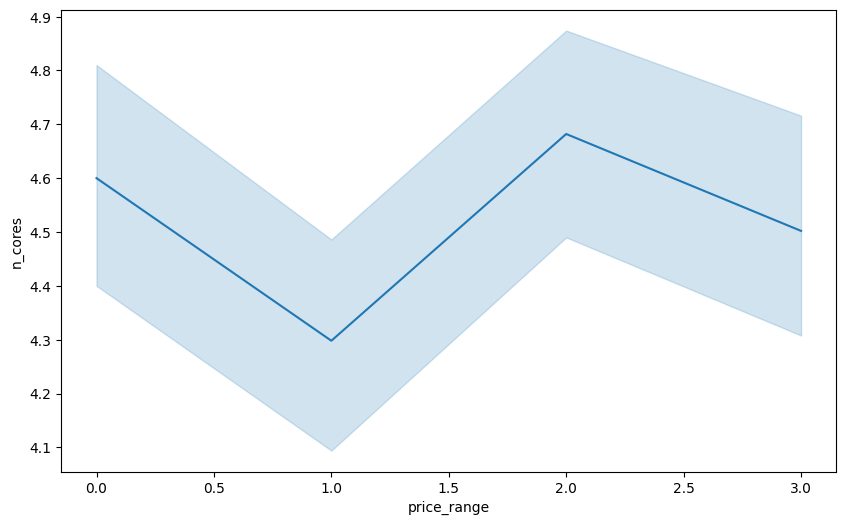

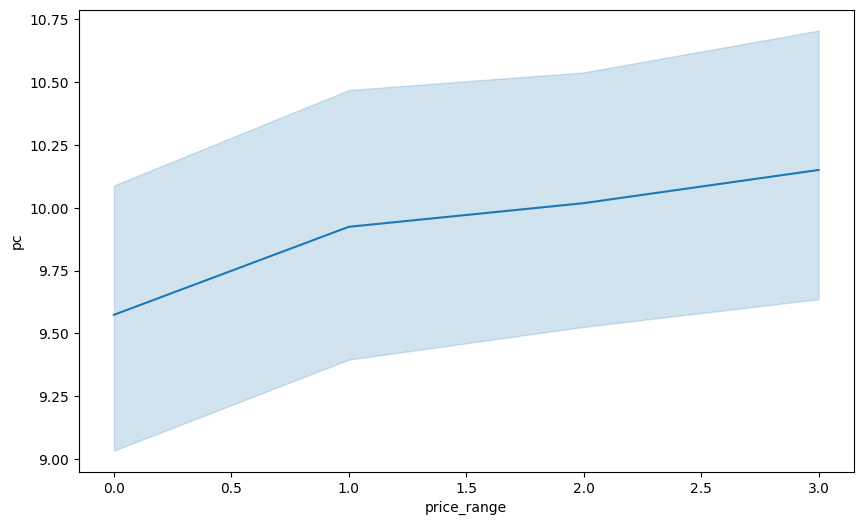

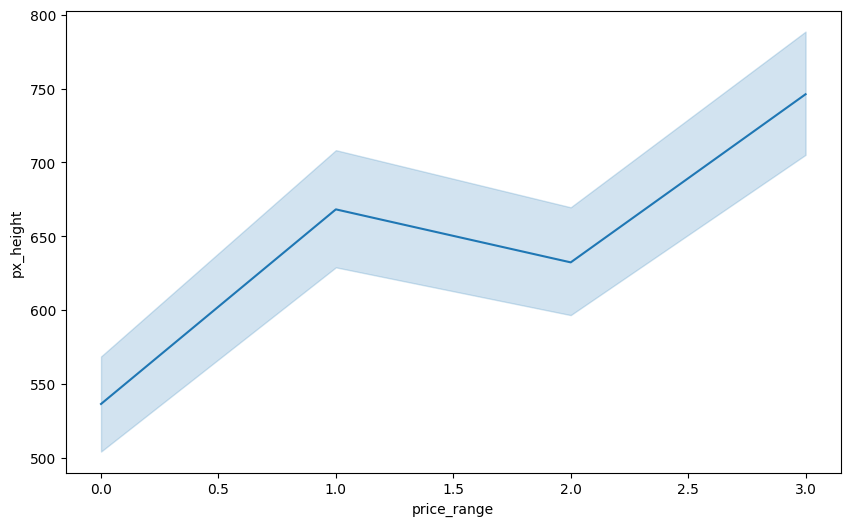

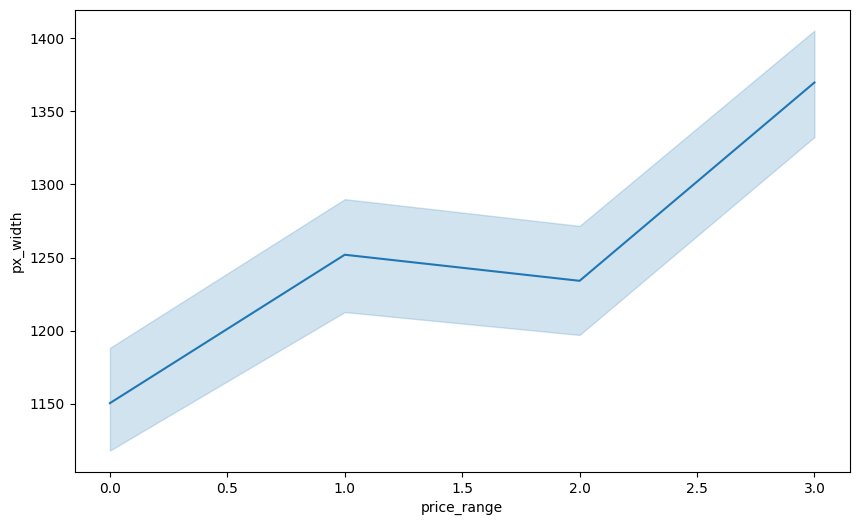

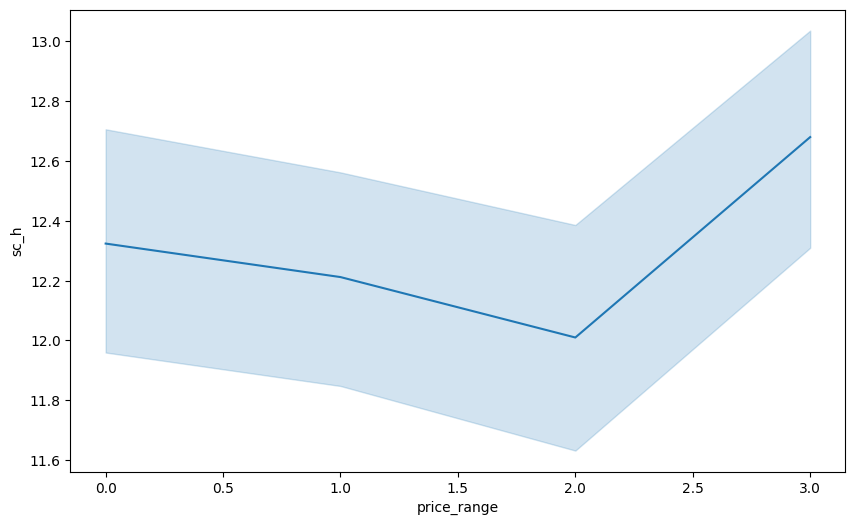

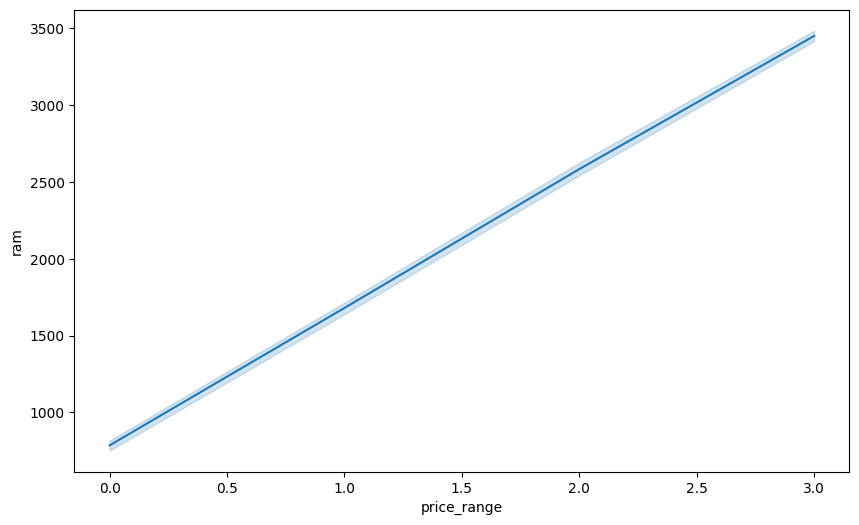

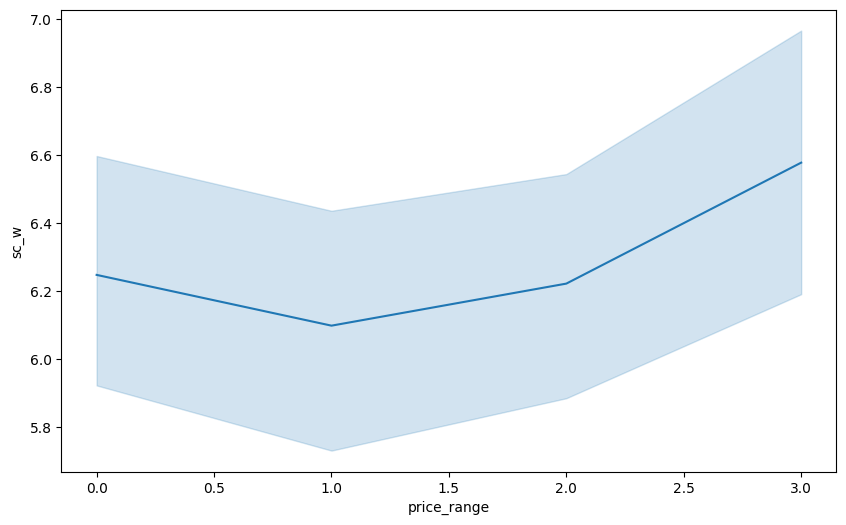

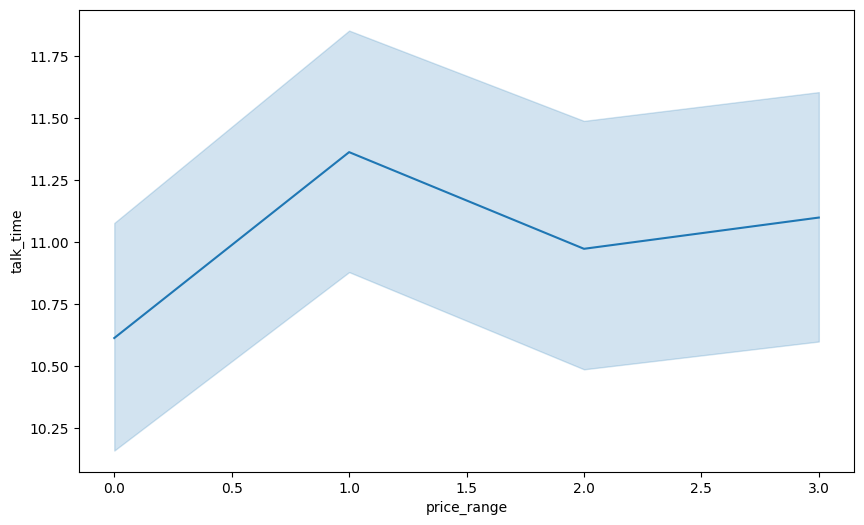

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=df['price_range'],y=df[var])

##### 1. Why did you pick the specific chart?

Check which numerical feature is driving the price range most.

##### 2. What is/are the insight(s) found from the chart?

For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.

Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.

Mobiles having max screen height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

RAM has clear relationship with price range

#### Chart - 10

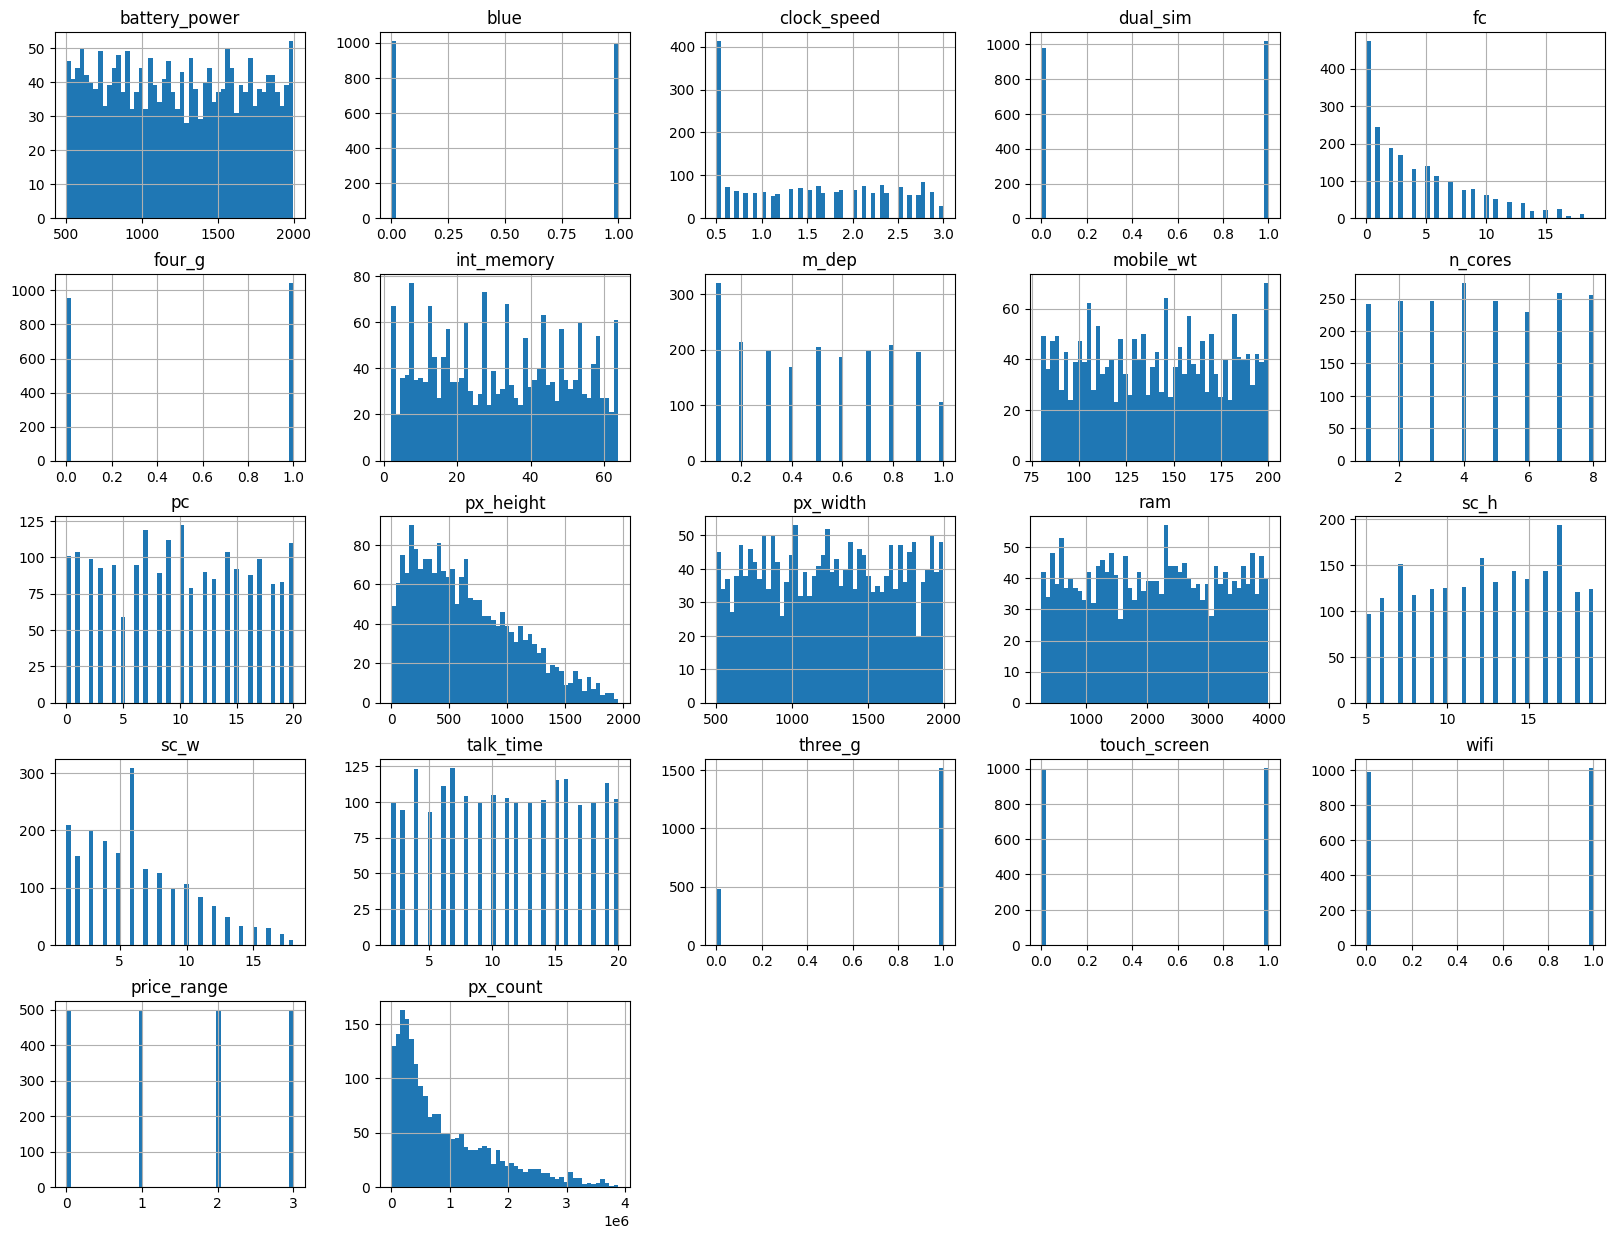

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

 The hist() function will use an array of numbers to create a histogram.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#checking the co_relation of dataset
corr = df.corr()
corr.shape

(22, 22)

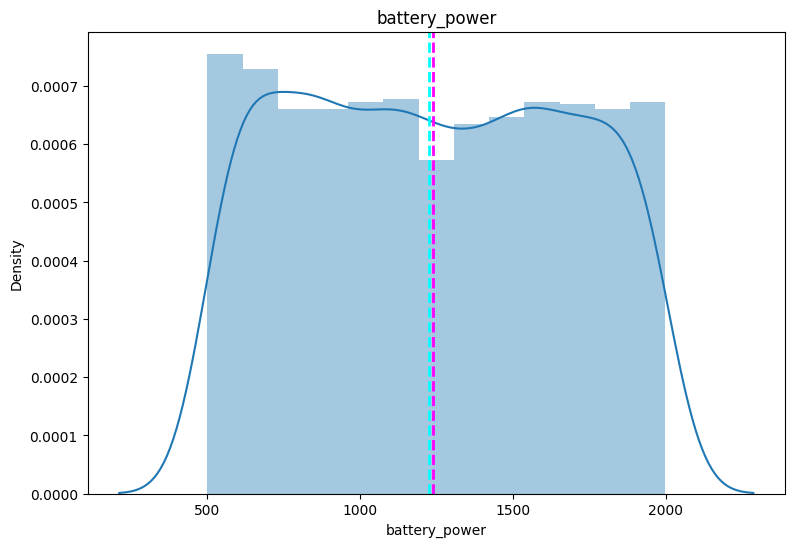

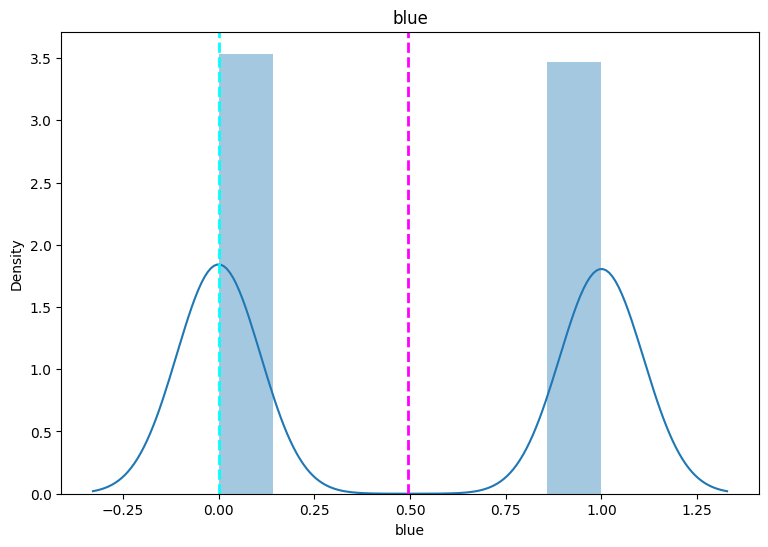

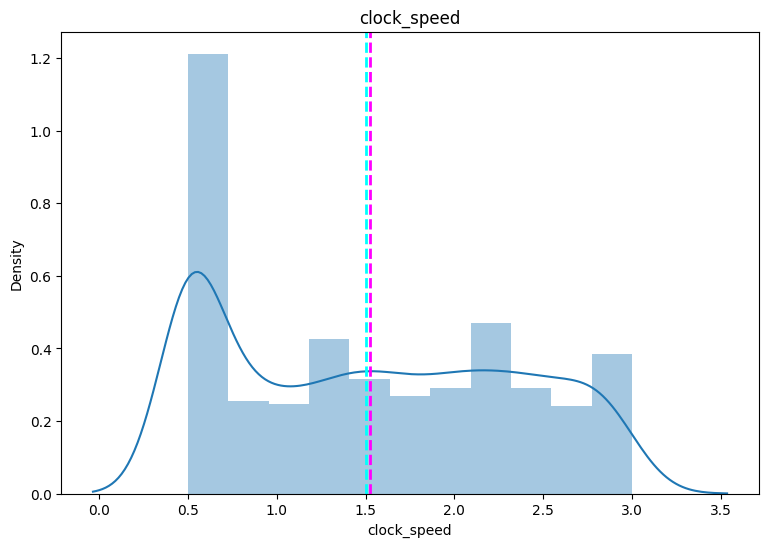

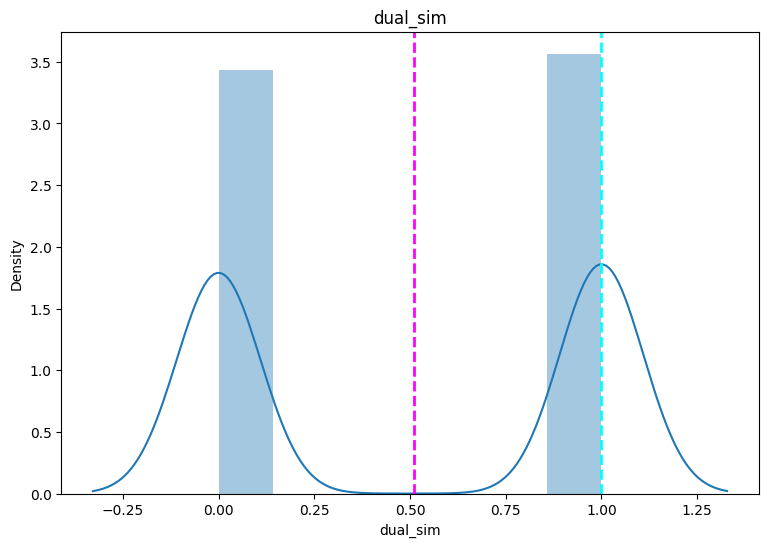

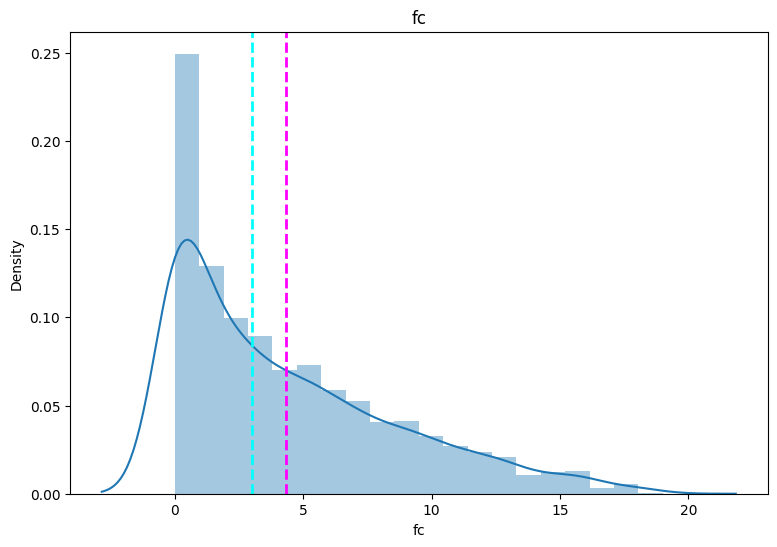

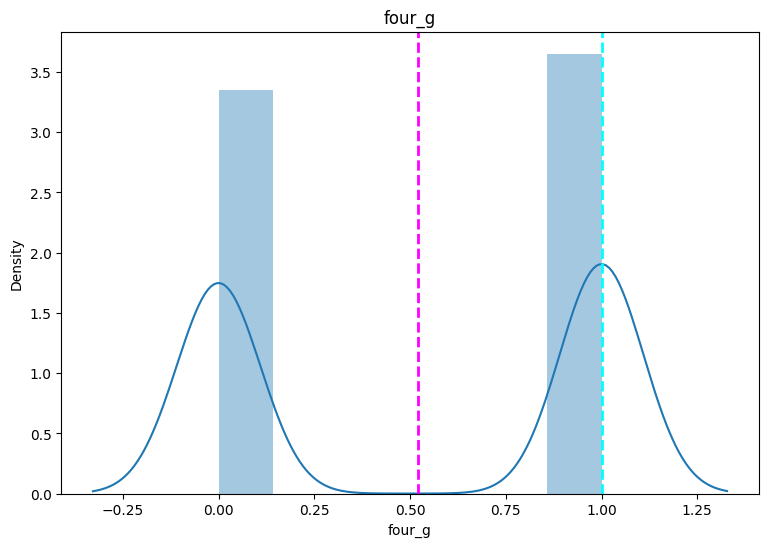

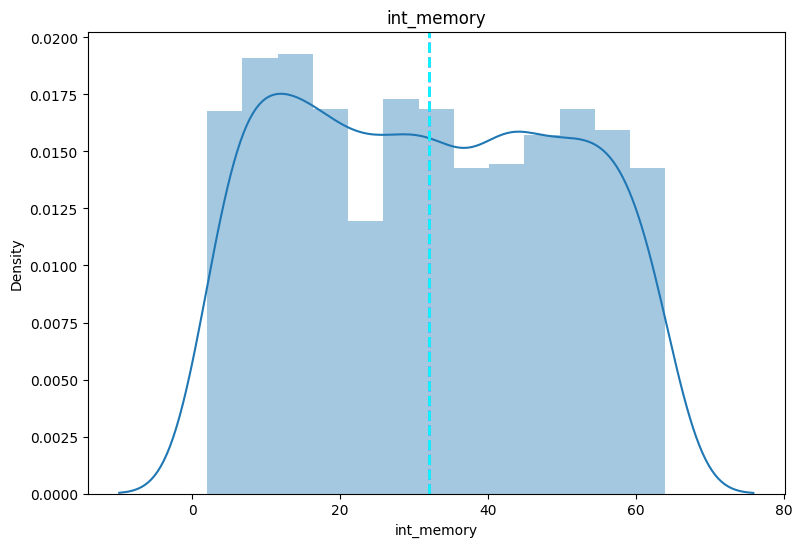

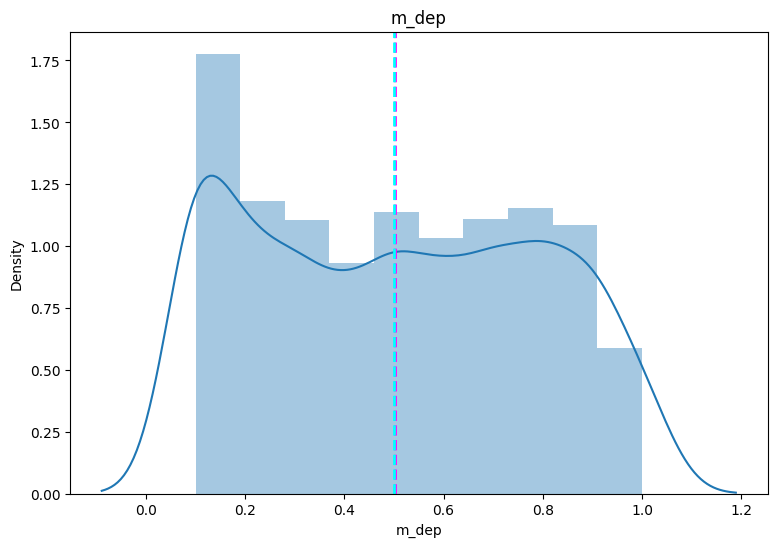

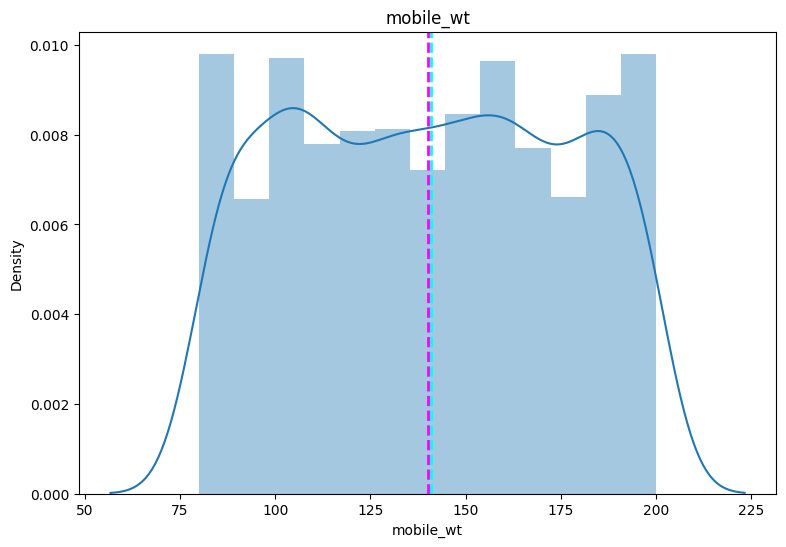

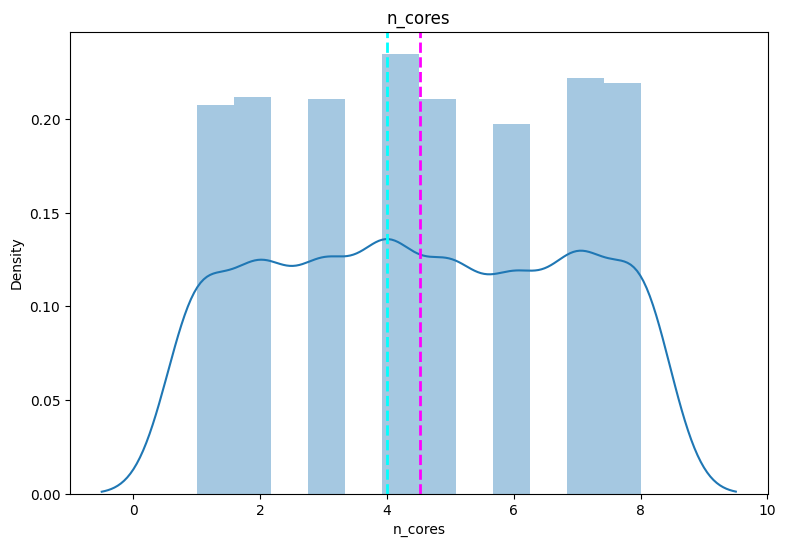

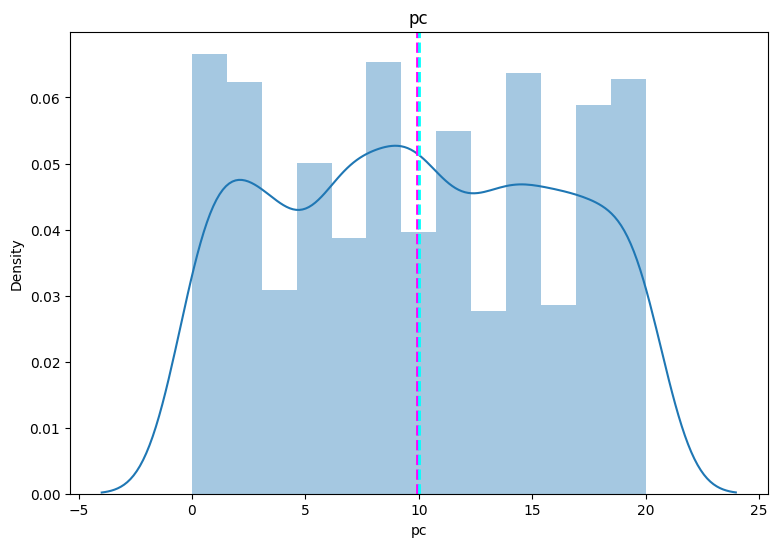

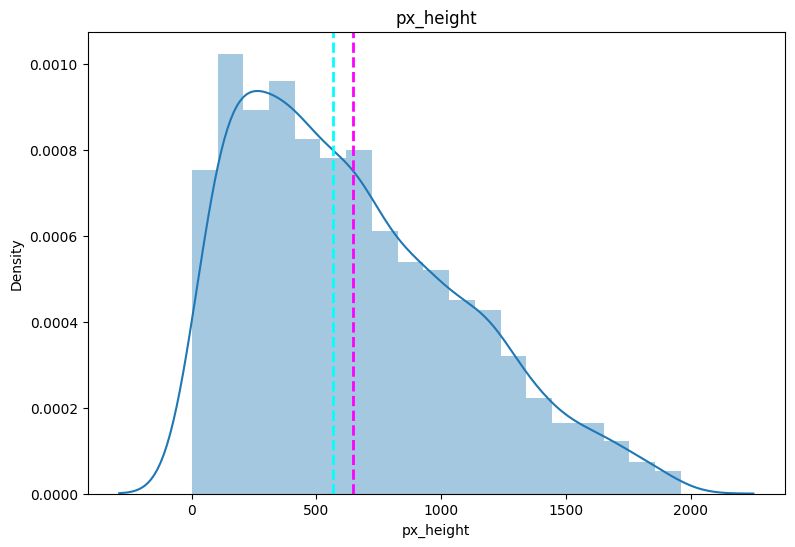

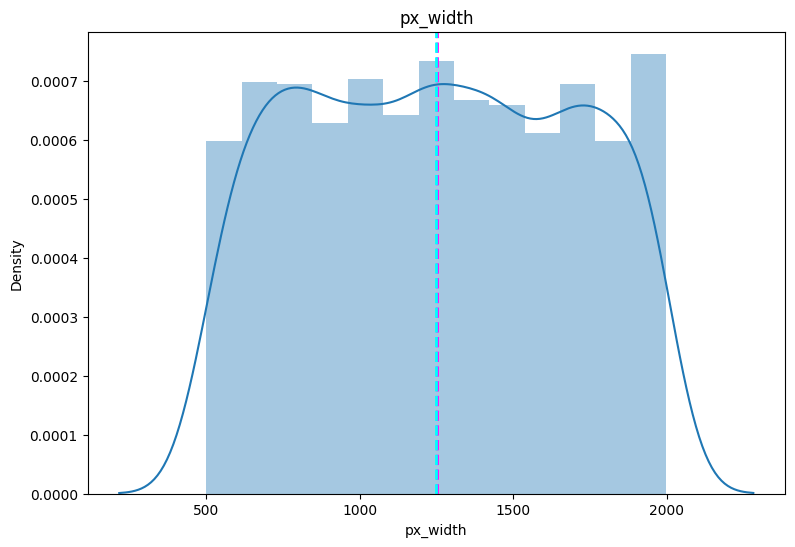

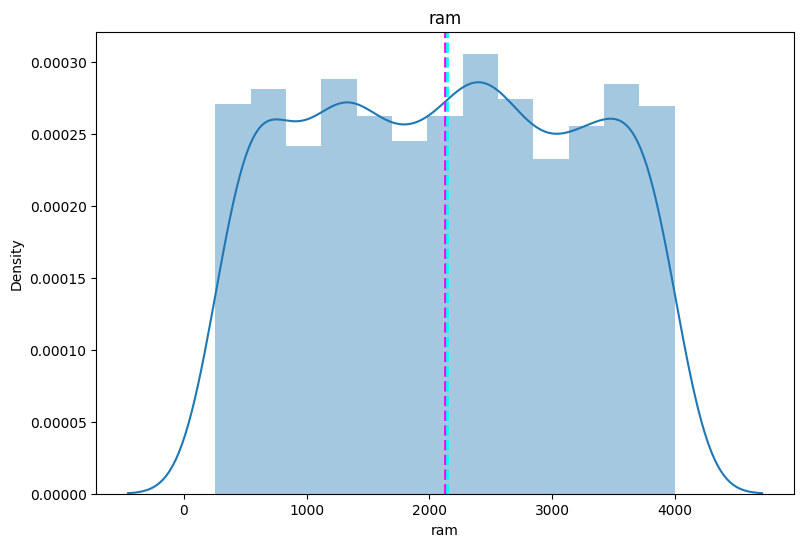

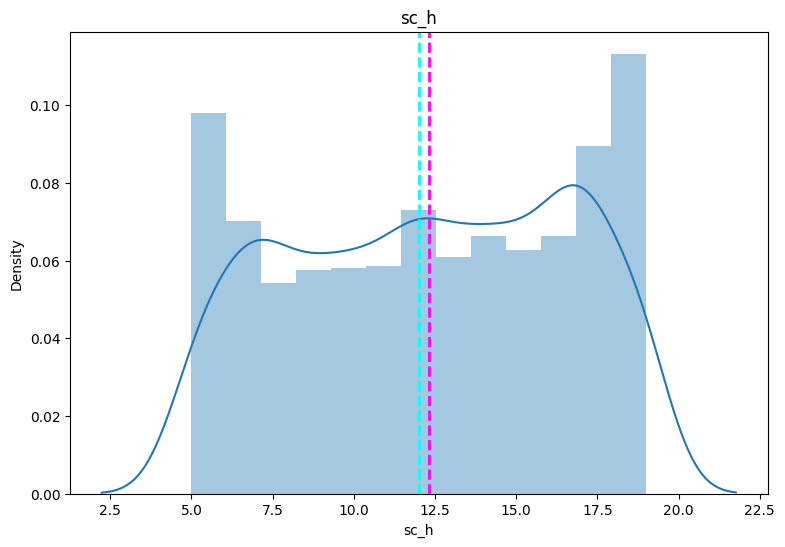

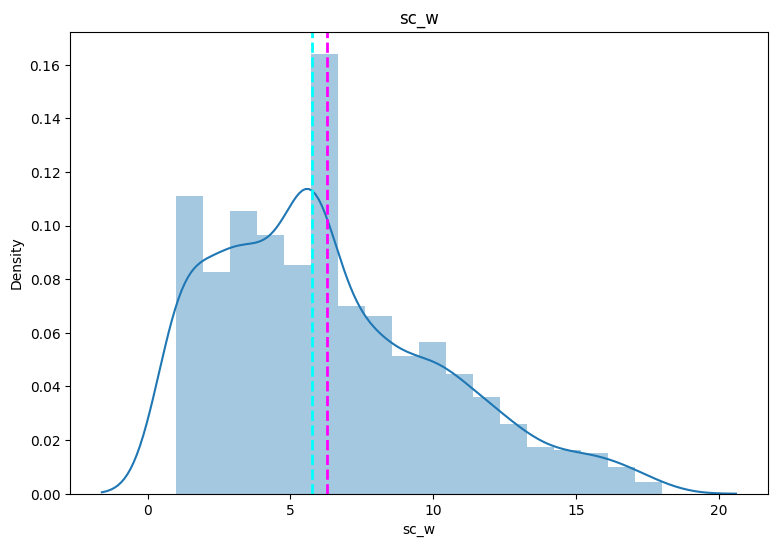

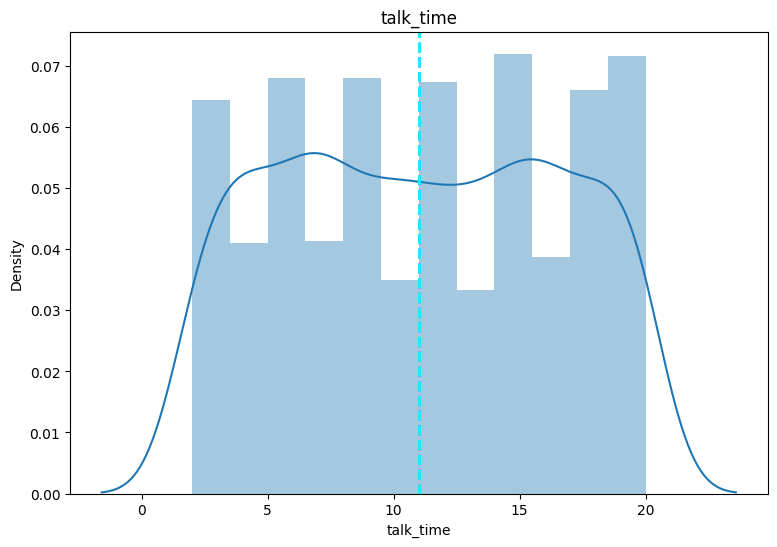

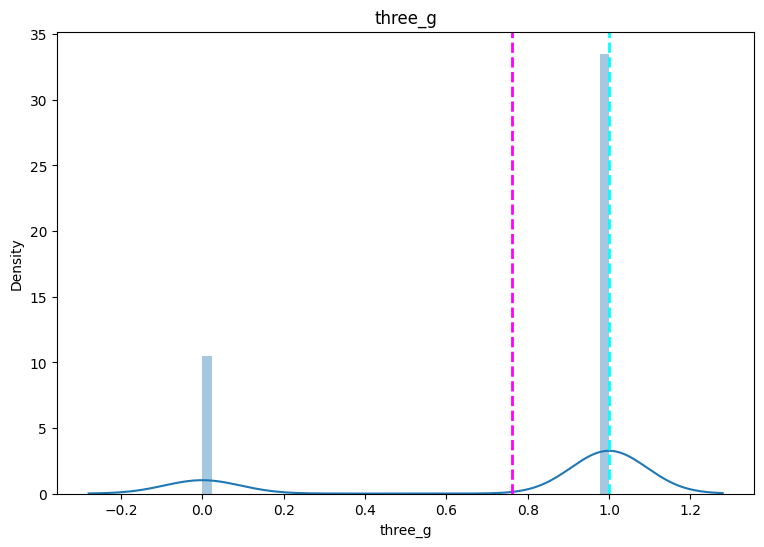

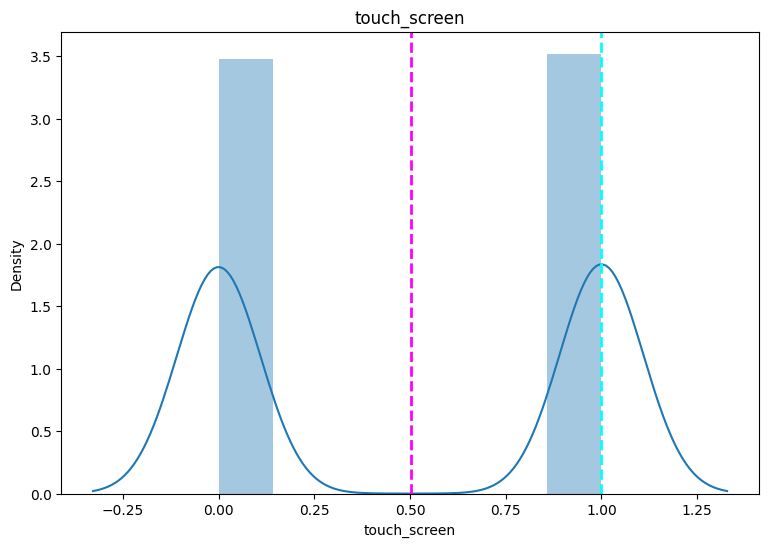

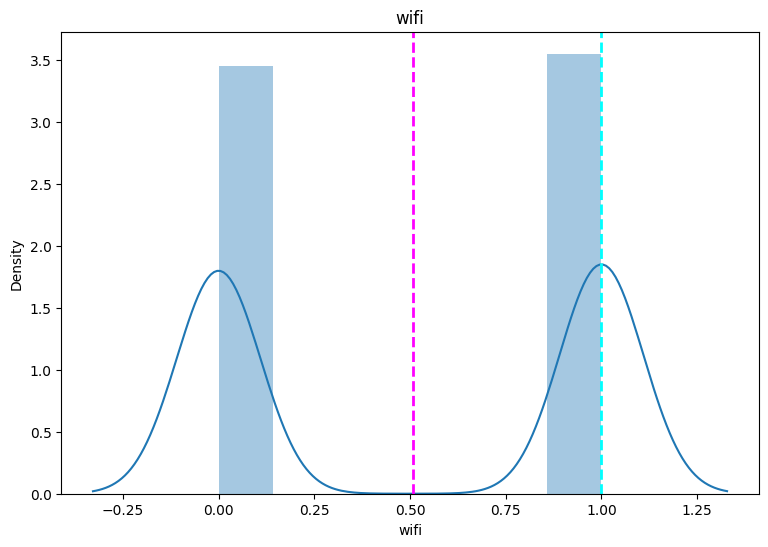

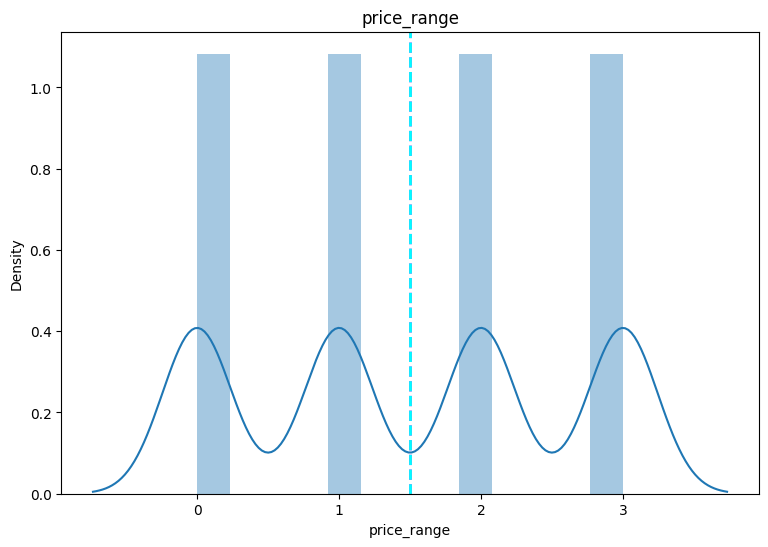

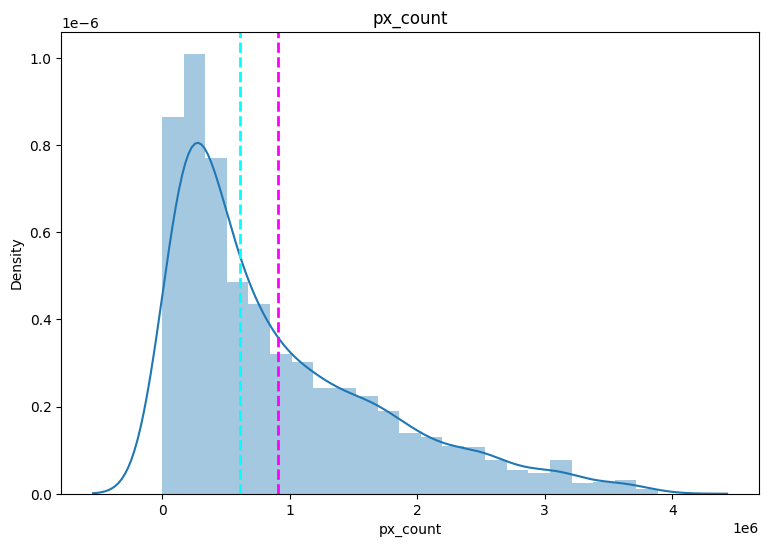

In [ ]:

for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Visualizing code of hist plot for each columns to know the data distibution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation Heatmap

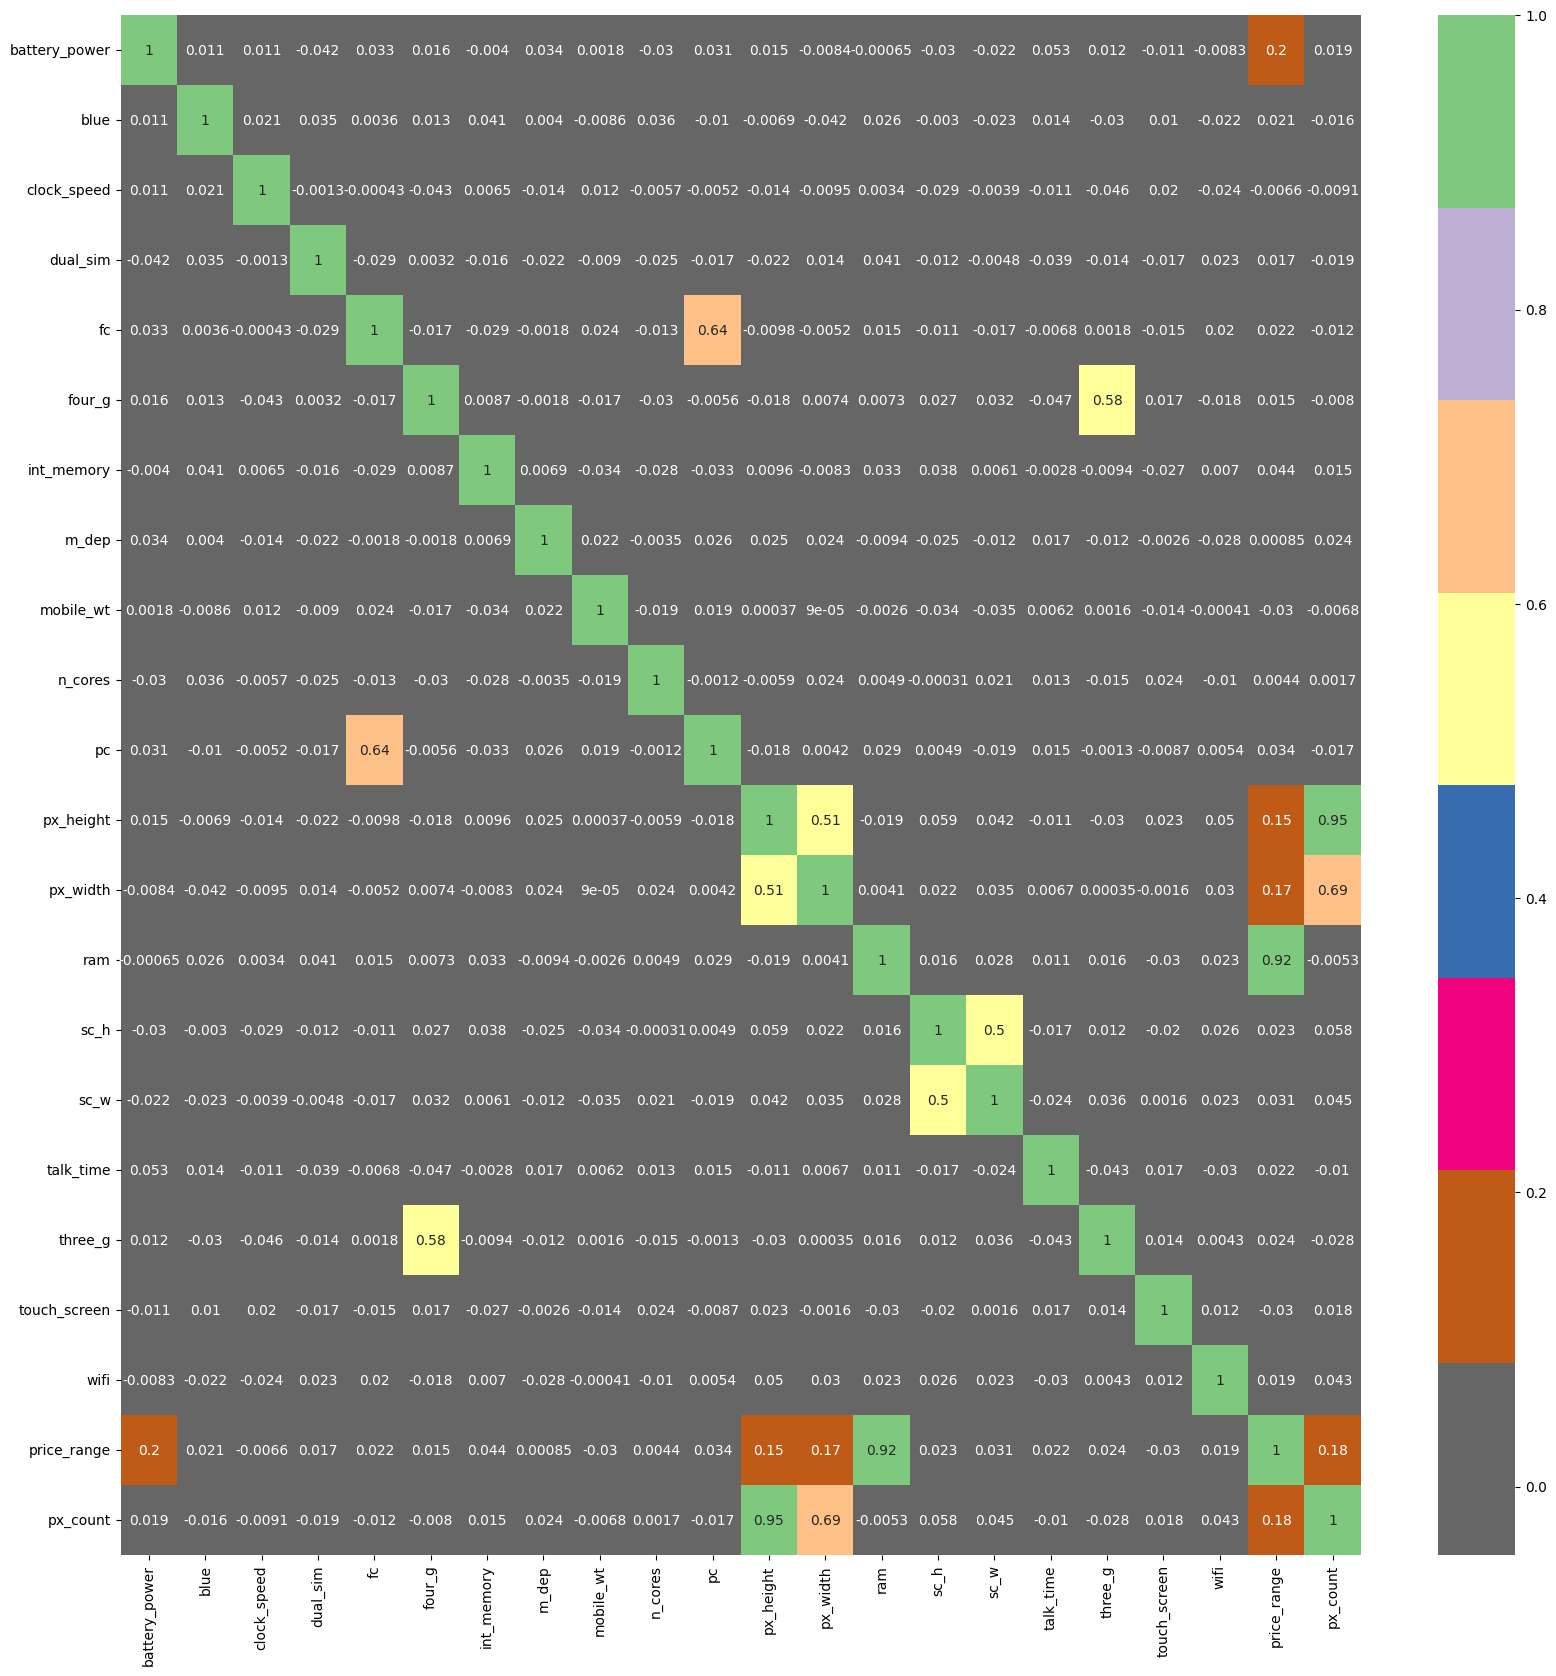

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation of target varaible i.e Dependent variable with the other independent variable.

##### 2. What is/are the insight(s) found from the chart?

*RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.*

*Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.*

*Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.*

*Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.*

*primary camera i.e pc and front camera fc are positively correlated.*

*sc_h and sc_w are positively correlated.*

# **Now start wih Machine Learning algorithim**





In [ ]:
#importing all libraries
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515071 sha256=68427e8095b4addc39b492b38248968a85f1c972a83b081e234d0d7288ebf614
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


#**5** **Feature Selection with hypothesis test**

Chi-test: It is help to figure-out relation between features and label with "pvalue <= 0.1"

In [ ]:
ct = pd.crosstab(df['wifi'],df['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
    print("Null hypothesis passed. int_memory and price_range doesnot have  Relationship")

pvalue :  0.8359905195342198
Null hypothesis passed. int_memory and price_range doesnot have  Relationship


In [ ]:
#  defining new variable for pixels

df['pixels'] = data_num['px_height']*data_num['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'],axis=1,inplace=True)

In [ ]:
# Defining X and y
x = df.drop(['price_range'], axis = 1).values
y = df['price_range'].values

In [ ]:
x.shape

(2000, 20)

In [ ]:
y.shape

(2000,)

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#**spliting training and testing data**

In [ ]:
#separate the dataset in two type one trainingis 75% of data and other testing is 25% of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1500, 20)
(500, 20)


#7. **ML Model Implementation**

here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1.Logistic Regression

2.k_nearest neighbours

3.naive bayes theorm

4.support vector classification

5.DecisionTreeClassifier

6.RandomForestClassifier

7.XGB boostclassifie

### ML Model - 1  **Implementing logistic regression**

In [ ]:
# Applying logistic regression
logmodel= LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Checking the coefficients
logmodel.coef_

array([[-3.28718454e+00,  5.76491191e-02,  1.78143090e-01,
         4.63750459e-02, -1.69284529e-01, -3.97479195e-02,
        -2.54944774e-01, -9.21416325e-02,  3.67427394e-01,
         9.54065008e-02, -9.70584131e-02, -1.36279191e+01,
         5.28489780e-02, -4.53408563e-02, -2.65038123e-01,
        -1.39398545e-01,  2.91616800e-02,  1.33627207e-01,
        -2.29940483e+00, -2.29940483e+00],
       [-8.11360276e-01, -2.71169295e-02, -4.88649858e-02,
         2.47977052e-02,  6.12188654e-02,  7.73374519e-02,
         1.15722885e-02,  1.69946680e-01,  1.80042726e-01,
        -3.04365724e-01,  4.64236779e-02, -3.87536899e+00,
        -3.35932779e-02, -1.59403065e-01,  1.05083356e-01,
        -4.82525229e-02,  2.80103767e-02,  2.51798299e-02,
        -3.75299726e-01, -3.75299726e-01],
       [ 7.64998917e-01, -1.74977684e-02, -8.24845565e-02,
        -1.07908080e-01,  2.00703704e-01, -1.73271258e-01,
        -1.75346449e-01, -1.54306540e-01,  1.53916132e-01,
         1.27176405e-01, -1.0

In [ ]:
# Checking the intercept value
logmodel.intercept_

array([  8.29438595,   3.62536047,  -1.20703749, -10.71270893])

In [ ]:
# Predict on the model
# Get the predicted probabilities
trainscore =  logmodel.score(x_train,y_train)
testscore =  logmodel.score(x_test,y_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi =  logmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')

# Get the confusion matrix for both train and test
print(confusion_matrix(y_test, y_predlogi))


train score: 0.9153333333333333 

test score: 0.898 

 f1 score:  0.898 

[[123   9   0   0]
 [  6  95   8   0]
 [  0   9 101   9]
 [  0   0  10 130]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.898 

 recall score:  0.898 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.84      0.87      0.86       109
           2       0.85      0.85      0.85       119
           3       0.94      0.93      0.93       140

    accuracy                           0.90       500
   macro avg       0.89      0.90      0.89       500
weighted avg       0.90      0.90      0.90       500



In [ ]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = logmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.98838



**Finally we made result in logistic regression !!**

1.I used Logistic regression to create the model. As I got not so good result.so next tryting to improving the score by using hyperparameter tuning technique.

2.For training score is 91% and testing score 90%

3.For testing dataset, i found precision of 90% and recall of 90% and f1-score of 90% . BUt, I am also interested to see the result for mobile price range result as

a.I got low(0) price precision 96% of and recall of 94% and f1-score of 95%.

b.I got medium(1) price precision 86% of and recall of 90% and f1-score of 88%.

c.I got High(2) price precision 88% of and recall of 84% and f1-score of 86%.

d.I got very high(3) price precision 92% of and recall of 94% and f1-score of 93%.

**Cross- Validation & Hyperparameter Tuning**

In [ ]:
## ML Model - 1 Implementation with hyperparameter optimization techniques
param={'C':[0.01,0.1,1,10,100,110,120,130]}
grid=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

In [ ]:
# Predict on the model
# Get the predicted classes
trainscore =  grid.score(x_train,y_train)
testscore =  grid.score(x_test,y_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi =  grid.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))


train score: 0.942 

test score: 0.944 

 f1 score:  0.944 

[[126   6   0   0]
 [  2 103   4   0]
 [  0   4 110   5]
 [  0   0   7 133]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.944 

 recall score:  0.944 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       132
           1       0.91      0.94      0.93       109
           2       0.91      0.92      0.92       119
           3       0.96      0.95      0.96       140

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training score is 95% and testing score 94%.

For testing dataset,

a.I got low(0) price precision 98% of and recall of 95% and f1-score of 97%.

b.I got medium(1) price precision 89% of and recall of 94% and f1-score of 91%.

c.I got High(2) price precision 91% of and recall of 90% and f1-score of 91%.

d.I got very high(3) price precision 96% of and recall of 96% and f1-score of 96%

### ML Model - 2  implementing K_nearest neighbours(knn)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(x_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

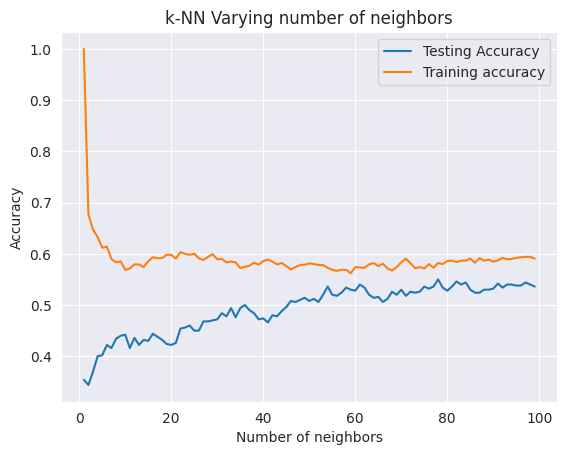

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=90)
# Fit the model
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=90)

In [ ]:
# Predict on the model
# Get the predicted classes
trainscore =  knn.score(x_train,y_train)
testscore =  knn.score(x_test,y_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi =  knn.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))

train score: 0.5846666666666667 

test score: 0.532 

 f1 score:  0.532 

[[94 37  1  0]
 [31 50 25  3]
 [ 8 34 63 14]
 [ 0  9 72 59]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  0.532 

 recall score:  0.532 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       132
           1       0.38      0.46      0.42       109
           2       0.39      0.53      0.45       119
           3       0.78      0.42      0.55       140

    accuracy                           0.53       500
   macro avg       0.56      0.53      0.53       500
weighted avg       0.58      0.53      0.54       500



In [ ]:
#-------------------------------------- K_neigbours classifier -------------------------------------
probabilityValues = knn.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)


0.8091466666666667


**finally we made result in Knn classifier!!**

1.I used knn classifier to create the model. As I got not so good result.

2.For training score is 56% and testing score 52%

3.For testing dataset, i found precision of 52% and recall of 52% and f1-score of 52% . BUt, I am also interested to see the result for mobile price range result as

a.I got low(0) price precision 68% of and recall of 67% and f1-score of 67%.

b.I got medium(1) price precision 36% of and recall of 42% and f1-score of 39%.

c.I got High(2) price precision 41% of and recall of 55% and f1-score of 47%.

d.I got very high(3) price precision 79% of and recall of 46% and f1-score of 58%.

### ML Model - 3 Implementing XGBclassifier.

In [ ]:
# Applying XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:

# Prediction
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for test
print('Train_score:',accuracy_score(y_train,y_pred_train),'\n')
print('test score:',accuracy_score(y_test,y_pred_test),'\n')
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Train_score: 0.9993333333333333 

test score: 0.88 

 precision score:  0.88 

 recall score:  0.88 

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       132
           1       0.78      0.93      0.85       109
           2       0.86      0.76      0.80       119
           3       0.90      0.94      0.92       140

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



**finally we made result in XGB classifier!!**

1.I used xgb classifier to create the model. As I got so good result.

2.For training score is 100% and testing score 89%

3.For testing dataset, i found precision of 89% and recall of 89% and f1-score of 89% . BUt, I am also interested to see the result for mobile price range result as

a.I got low(0) price precision 98% of and recall of 89% and f1-score of 94%.

b.I got medium(1) price precision 80% of and recall of 94% and f1-score of 87%.

c.I got High(2) price precision 88% of and recall of 80% and f1-score of 84%.

d.I got very high(3) price precision 91% of and recall of 94% and f1-score of 92%

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.827 total time=   0.0s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.850 total time=   0.0s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.857 total time=   0.0s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.833 total time=   0.0s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
#find best params value
grid.best_params_


{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
#find best estimeter
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
XGBClassifier(gamma=1.5, max_depth=10, n_estimators=200,
              objective='multi:softprob', subsample=0.5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#applying best estimeter value in xgboost
model=XGBClassifier(gamma=1.5, max_depth=10, n_estimators=200,
              objective='multi:softprob', subsample=0.5)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predict on the model
# Get the predicted probabilities
trainscore =  model.score(x_train,y_train)
testscore =  model.score(x_test,y_test)
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predxgb = model.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predxgb,average='micro'),'\n')

# Get the confusion matrix for both train and test
print(confusion_matrix(y_test, y_predxgb))

train score: 0.9806666666666667 

test score: 0.894 

 f1 score:  0.894 

[[119  13   0   0]
 [  2 102   5   0]
 [  0  12  96  11]
 [  0   0  10 130]]


In [ ]:

# Evaluation metrics for train
print(' precision score: ',precision_score(y_test, y_predxgb,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predxgb,average='micro'),'\n')
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

 precision score:  0.894 

 recall score:  0.894 

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       381
           3       1.00      1.00      1.00       360

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



#### 2. Cross- Validation & Hyperparameter Tuning

Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

**finally we made result in cross validation of XGB classifier !!**

For training score is 98% and testing score 89%.

For testing dataset,

a.I got low(0) price precision 100% of and recall of 100% and f1-score of 100%.

b.I got medium(1) price precision 100% of and recall of 100% and f1-score of 81%.

c.I got High(2) price precision 100% of and recall of 100% and f1-score of 100%.

d.I got very high(3) price precision 100% of and recall of 100% and f1-score of 100%.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model and logistic regression which is hyperparameter optimized. first of all I need accuracy for the mobile price range prediction. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost. So, I tried both logistic and XGBoost. Here is their ealuation metrics and I would like to compare

# **Conclusion**

In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.

1. From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.

2. half the devices have Bluetooth, and half don’t

3. there is a gradual increase in battery as the price range increases

4. Ram has continuous increase with price range while moving from Low cost to Very high cost.

5. costly phones are lighter.

6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

7. form all the above experiments we can conclude that XGboosting and linear regression with using hyperparameters we got the best results

### ***Thank You***